# US Health Insurance Data Analysis

<p style="font-size: 1.2em; line-height: 1.3;">
In this project, we analyze a health insurance dataset to understand how various factors influence insurance costs.<br>
Additionally, we aim to employ the Multi-layer Perceptron Regressor (MLPRegressor), a type of neural network used in machine learning, to predict the insurance cost for individuals based on these factors.
</p>

Links to the neural model and dataset:
- Multi-layer Perceptron Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
- US Health Insurance Dataset: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset  or  https://www.kaggle.com/datasets/mirichoi0218/insurance

### Importing Libraries

In [79]:
import pandas as pd  # Library for data manipulation and analysis, especially for importing and processing datasets
import numpy as np  # Library for numerical operations, particularly useful for array manipulation and mathematical functions
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Data visualization library built on top of matplotlib, offering more complex visual patterns
from sklearn.model_selection import train_test_split  # Function to split the dataset into training and testing sets for model evaluation
from sklearn.neural_network import MLPRegressor  # Class for implementing a Multi-layer Perceptron Regressor for regression tasks
from sklearn.preprocessing import StandardScaler  # Tools for scaling data, StandardScaler for standardization and MinMaxScaler for normalization
from sklearn import metrics  # Library for accessing various metrics to evaluate machine learning models, such as MAE, MSE, and R2 Score

### Loading the Dataset

In [80]:
# Path of the dataset that will be loaded into a dataframe
insurance = pd.read_csv('insurance.csv')

### Data Inspection and Cleaning

In [81]:
# Display the first 5 rows to see how the dataframe is organizated
display(insurance.head())
# Print a concise summary of the dataframe
print(insurance.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


<div class="alert alert-block alert-success">
This dataset contains seven variables:<br>
<ul>
  <li><strong>age</strong> - The individual's age</li>
  <li><strong>sex</strong> - The individual's sex</li>
  <li><strong>bmi</strong> - Body mass index</li>
  <li><strong>children</strong> - Number of children</li>
  <li><strong>region</strong> - Geographic region within the US</li>
  <li><strong>charges</strong> - Total insurance cost</li>
</ul>
</div>

<div class="alert alert-info">
It is important to check the dataframe for any duplicate rows to ensure the data's integrity before proceeding with further analysis.
</div>

In [82]:
# Check if there are any duplicate rows
duplicates = insurance[insurance.duplicated(keep=False)]
# Print the duplicate rows, if there are any
print(duplicates)
# Print the initial count of rows
print(f'Number of rows: {insurance.shape[0]}')
# Remove duplicate rows
insurance.drop_duplicates(inplace=True)
# Print the count of rows after removing duplicates
print(f'Number of rows: {insurance.shape[0]}')

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631
Number of rows: 1338
Number of rows: 1337


<div class="alert alert-block alert-success">
The dataset is now complete, with no missing values or duplicate rows, and all data types are correctly specified.
</div>

<div class="alert alert-info">
We will now create a table displaying the descriptive statistics of the dataframe.
</div>

In [83]:
# Display summary statistics for numerical columns in the dataframe
display(insurance.describe())

# Display summary statistics for categorical columns in the dataframe
display(insurance.describe(include='object'))
# Display the unique values for each categorical column in the dataframe
for _ in insurance.select_dtypes(include='object'):
   print(f"Unique values in '{_}':")
   print(insurance[_].unique())
   print()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


Unique values in 'sex':
['female' 'male']

Unique values in 'smoker':
['yes' 'no']

Unique values in 'region':
['southwest' 'southeast' 'northwest' 'northeast']



<div class="alert alert-block alert-success">
We can see some interesting statistics in the variables: <br><br>
<strong>age:</strong> The range is from 18 years to 64 years old.<br>
<strong>children:</strong> The mean number of children per individual is 1.09, which is close to the median of 1. The data ranges from a minimum of 0 to a maximum of 5 children.<br>
<strong>charges:</strong> The range is from $1,121 to $63,770. There's a major difference between the 75th percentile and the maximum value, indicating that the distribution is right-skewed. This hypothesis is further supported by the mean being notably higher than the median.<br>
<strong>smoker:</strong> The dataset shows a substantially higher proportion of non-smokers.<br>
<br>
The dataset is complete, with no missing values, and all data types are correctly specified.<br>
Furthermore, the values fall within a plausible range.
</div>

## Exploratory Data Analysis (EDA)

### Visualizing a Correlation Matrix Between All Variables

<div class="alert alert-info">
To gain initial insights into the relationships between variables, we will use pandas' <code>corr()</code> method to compute the correlation matrix and visualize it using a heatmap.
</div>

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,-0.006691,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.017150,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.261999,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,-0.020206,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.053454,0.787234
region,-0.006691,0.017150,0.261999,-0.020206,0.053454,1.000000,0.056070
charges,0.298308,0.058044,0.198401,0.067389,0.787234,0.056070,1.000000


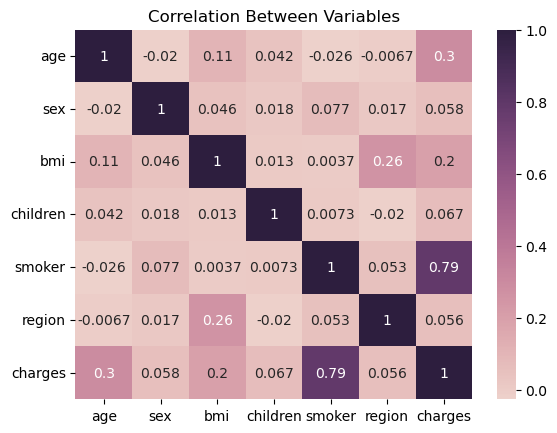

In [84]:
# Note: pandas.corr() calculates the correlation between numeric columns, so we need to convert some categorical columns to numeric values to use this function effectively.

# Make a copy of the insurance dataframe
insurance_integer = insurance.copy()
# Convert 'sex', 'smoker', and 'region' to numeric codes
insurance_integer['sex'].replace({'female': 0, 'male': 1}, inplace=True)
insurance_integer['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
insurance_integer['region'].replace({'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3}, inplace=True)

# Set up the correlation matrix
correlation_matrix = insurance_integer.corr()
# Print the correlation matrix
display(correlation_matrix)

# Generates a heatmap of the correlation between variables
ax = sns.heatmap(insurance_integer.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Correlation Between Variables')

# Show the figure
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
    Analysis of correlation with the variable charges:<br>
    <ul>
        <li><strong>smoker:</strong> Shows strong correlation (coefficient: <strong>0.787</strong>), indicating a significant impact on insurance costs.</li>
        <li><strong>age:</strong> Exhibits moderate correlation (coefficient: <strong>0.298</strong>), suggesting that age could influence insurance costs to some extent.</li>
        <li><strong>bmi:</strong> Has a relatively low correlation (coefficient: <strong>0.198</strong>), implying minimal impact on insurance costs.</li>
        <li><strong>sex, region, and children:</strong> Present even lower coefficients, indicating that their impact on insurance costs is likely negligible.</li>
    </ul>
</div>

### Visualizing Univariate Categorical Data Distribution

<div class="alert alert-info">
We will now visualize the proportions of some categorical variables using pie and bar charts.
</div>

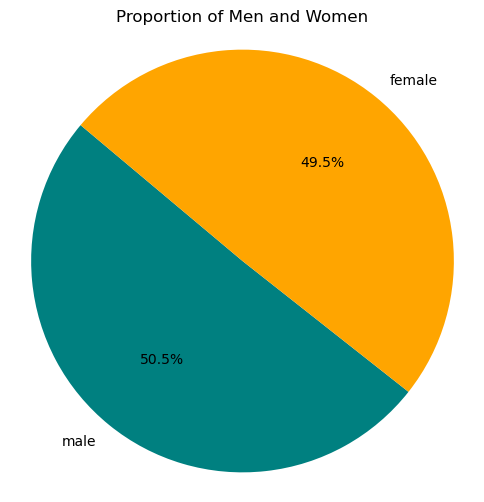

In [85]:
# Count occurrences of each category
sex_counts = insurance['sex'].value_counts()
# Data to plot
labels = sex_counts.index
sizes = sex_counts.values

# Make the plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=['teal', 'orange'],
        autopct='%1.1f%%', startangle=140)

# Give the plot a title
plt.title('Proportion of Men and Women')
# Equal aspect ratio so that the pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The proportion of men to women in the dataset is well-balanced.
</div>

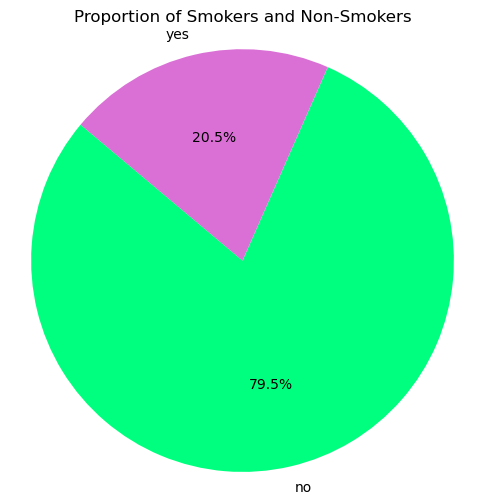

In [86]:
# Count occurrences of each category
smoker_counts = insurance['smoker'].value_counts()
# Data to plot
labels = smoker_counts.index
sizes = smoker_counts.values

# Make the plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=['springgreen', 'orchid'],
        autopct='%1.1f%%', startangle=140)

# Give the plot a title
plt.title('Proportion of Smokers and Non-Smokers')
# Equal aspect ratio so that the pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Smokers constitute only 20.5% of the total population in the dataset.
</div>

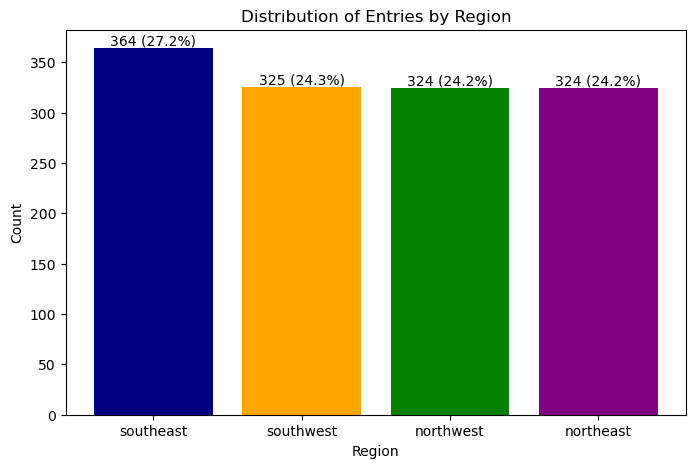

In [87]:
# Count occurrences of each region
region_counts = insurance['region'].value_counts()

# Data to plot
labels = region_counts.index
sizes = region_counts.values

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, sizes, color=['navy', 'orange', 'green', 'purple'])

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Entries by Region')

# Calculate percentages
total_count = region_counts.sum()
percentages = (region_counts/total_count)*100

# Add percentage labels above each bar
for bar in bars:
    height = bar.get_height()
    percentage = (height/total_count)*100
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height} ({percentage:.1f}%)', 
             ha='center', va='bottom')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The dataset contains a higher number of individuals from the Southeast region.
</div>

### Visualizing Univariate Numerical Data Distribution

<div class="alert alert-info">
We will now visualize the distribution of some numerical variables using histograms.
</div>

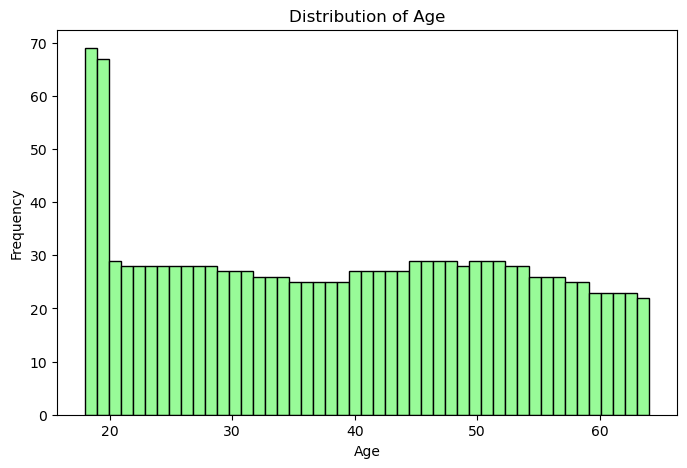

In [88]:
# Plot histogram for the 'age' column
plt.figure(figsize=(8, 5))
plt.hist(insurance['age'], bins=47, color='palegreen', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Apart from a prominent mode at 18 and 19 years old, the age distribution appears to be fairly uniform from 20 to 64 years old.
</div>

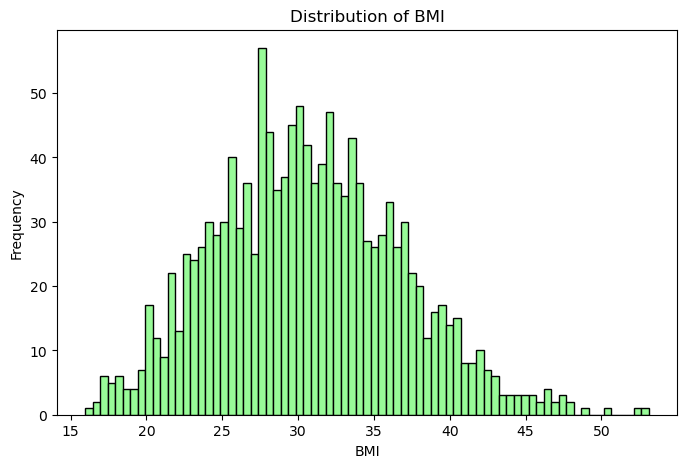

In [89]:
# Plot histogram for the 'bmi' column
plt.figure(figsize=(8, 5))
plt.hist(insurance['bmi'], bins=75, color='palegreen', edgecolor='black')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The BMI variable appears to follow a normal distribution.
</div>

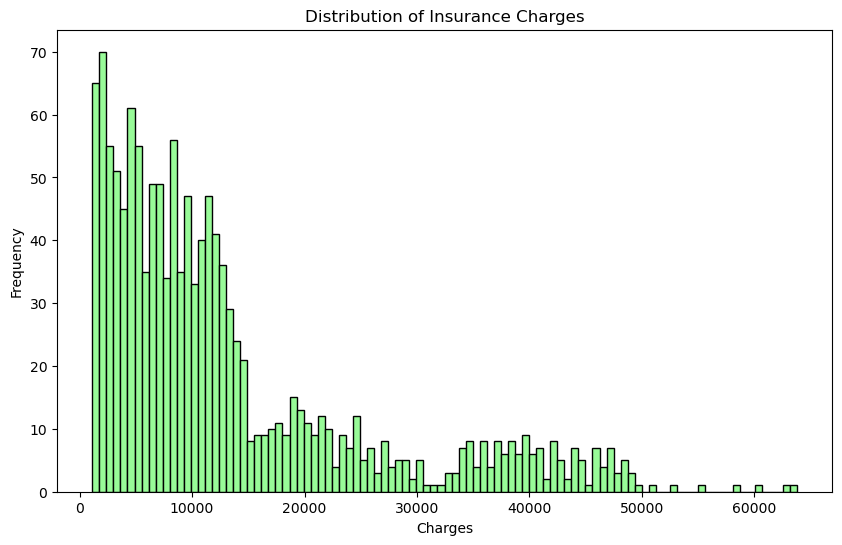

In [90]:
# Plot histogram for the 'charges' column
plt.figure(figsize=(10, 6))
plt.hist(insurance['charges'], bins=100, color='palegreen', edgecolor='black')

# Add labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Charges')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The charges variable is highly right-skewed, with the mode concentrated near the beginning of the distribution.
</div>

### Visualizing Univariate Numerical Data Across Categories

<div class="alert alert-info">
We will now visualize the distribution of several numerical variables against categorical variables using box plots and violin plots.
</div>

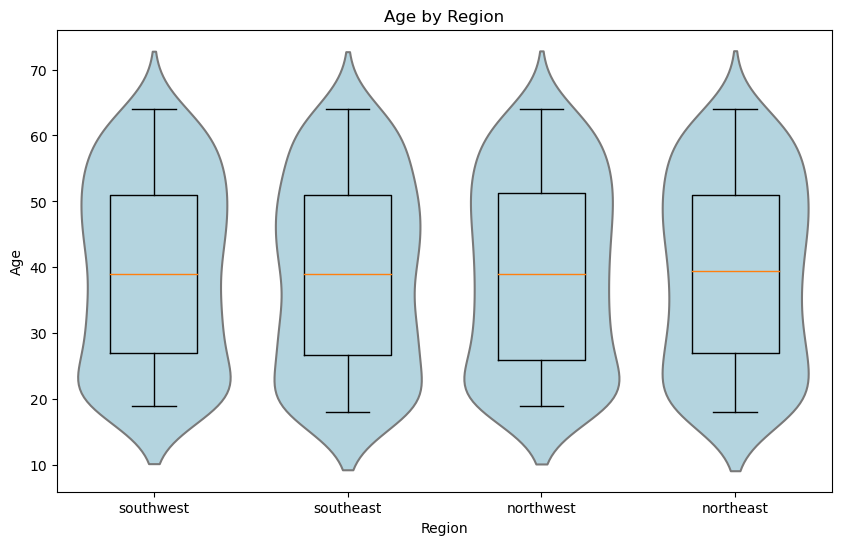

In [91]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the boxplot
ax.boxplot([insurance[insurance['region'] == region]['age'] for region in insurance['region'].unique()],
           positions=range(len(insurance['region'].unique())))

# Plot the violinplot
sns.violinplot(x='region', y='age', data=insurance, ax=ax, color='lightblue', inner=None)

# Add labels and title
ax.set_xticklabels(insurance['region'].unique())
ax.set_xlabel('Region')
ax.set_ylabel('Age')
ax.set_title('Age by Region')

# Show the plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Age is almost equally distributed across all regions.
</div>

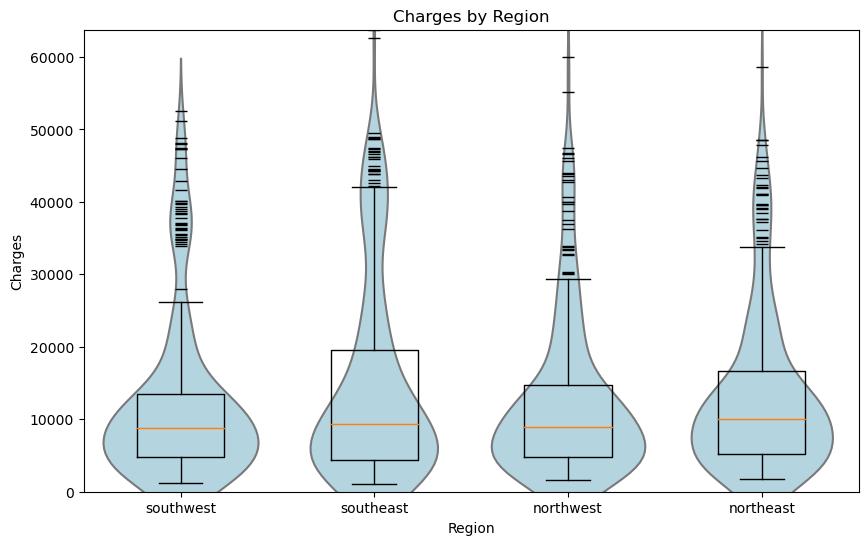

In [92]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom outlier properties for boxplot
flierprops = dict(marker='_', markersize=8)

# Plot the boxplot
ax.boxplot([insurance[insurance['region'] == region]['charges'] for region in insurance['region'].unique()],
           positions=range(len(insurance['region'].unique())), flierprops=flierprops)

# Plot the violinplot
sns.violinplot(x='region', y='charges', data=insurance, ax=ax, color='lightblue', inner=None)

# Set y-axis limit to start at 0
ax.set_ylim(0, insurance['charges'].max())

# Add labels and title
ax.set_xticklabels(insurance['region'].unique())
ax.set_xlabel('Region')
ax.set_ylabel('Charges')
ax.set_title('Charges by Region')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Except for the Southeast region, it seems that the charges are similarly distributed.
</div>

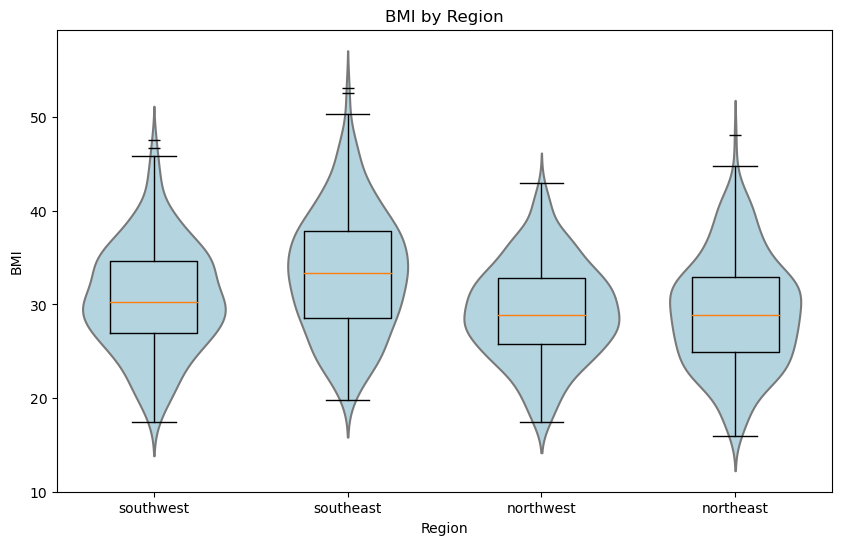

In [93]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom outlier properties for boxplot
flierprops = dict(marker='_', markersize=8)

# Plot the boxplot
ax.boxplot([insurance[insurance['region'] == region]['bmi'] for region in insurance['region'].unique()],
           positions=range(len(insurance['region'].unique())), flierprops=flierprops)

# Plot the violinplot
sns.violinplot(x='region', y='bmi', data=insurance, ax=ax, color='lightblue', inner=None)

# Add labels and title
ax.set_xticklabels(insurance['region'].unique())
ax.set_xlabel('Region')
ax.set_ylabel('BMI')
ax.set_title('BMI by Region')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Except for the Southeast region, the charges appear to be fairly evenly distributed.<br>
The higher BMI in the Southeast might explain the higher charges in that region.
</div>

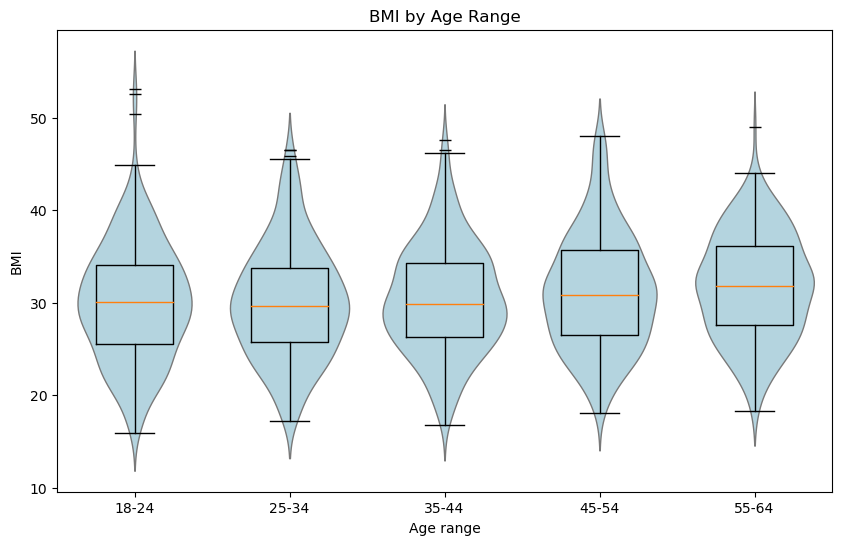

In [94]:
# Define age ranges (bins) and create a new column for age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
insurance['age_range'] = pd.cut(insurance['age'], bins=bins, labels=labels, right=False)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom outlier properties for the boxplot
flierprops = dict(marker='_', markersize=8)

# Plot the boxplot for BMI by age range
ax.boxplot([insurance[insurance['age_range'] == age]['bmi'] for age in labels],
           positions=range(len(labels)), flierprops=flierprops)

# Plot the violin plot for the same data
sns.violinplot(x='age_range', y='bmi', data=insurance, ax=ax, inner=None, color='lightblue', linewidth=1)

# Add labels and title
ax.set_xticklabels(labels)
ax.set_xlabel('Age range')
ax.set_ylabel('BMI')
ax.set_title('BMI by Age Range')

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

# Drop the 'age_range' column
insurance.drop(columns=['age_range'], inplace=True)

<div class="alert alert-block alert-success">
BMI appears to be slightly higher in the 45 to 54 and 55 to 64 age ranges compared to younger groups.
</div>

### Visualizing Bivariate Numerical Data

<div class="alert alert-info">
We will now visualize the correlation between numerical variables using scatter, hexbin and KDE plots.
</div>

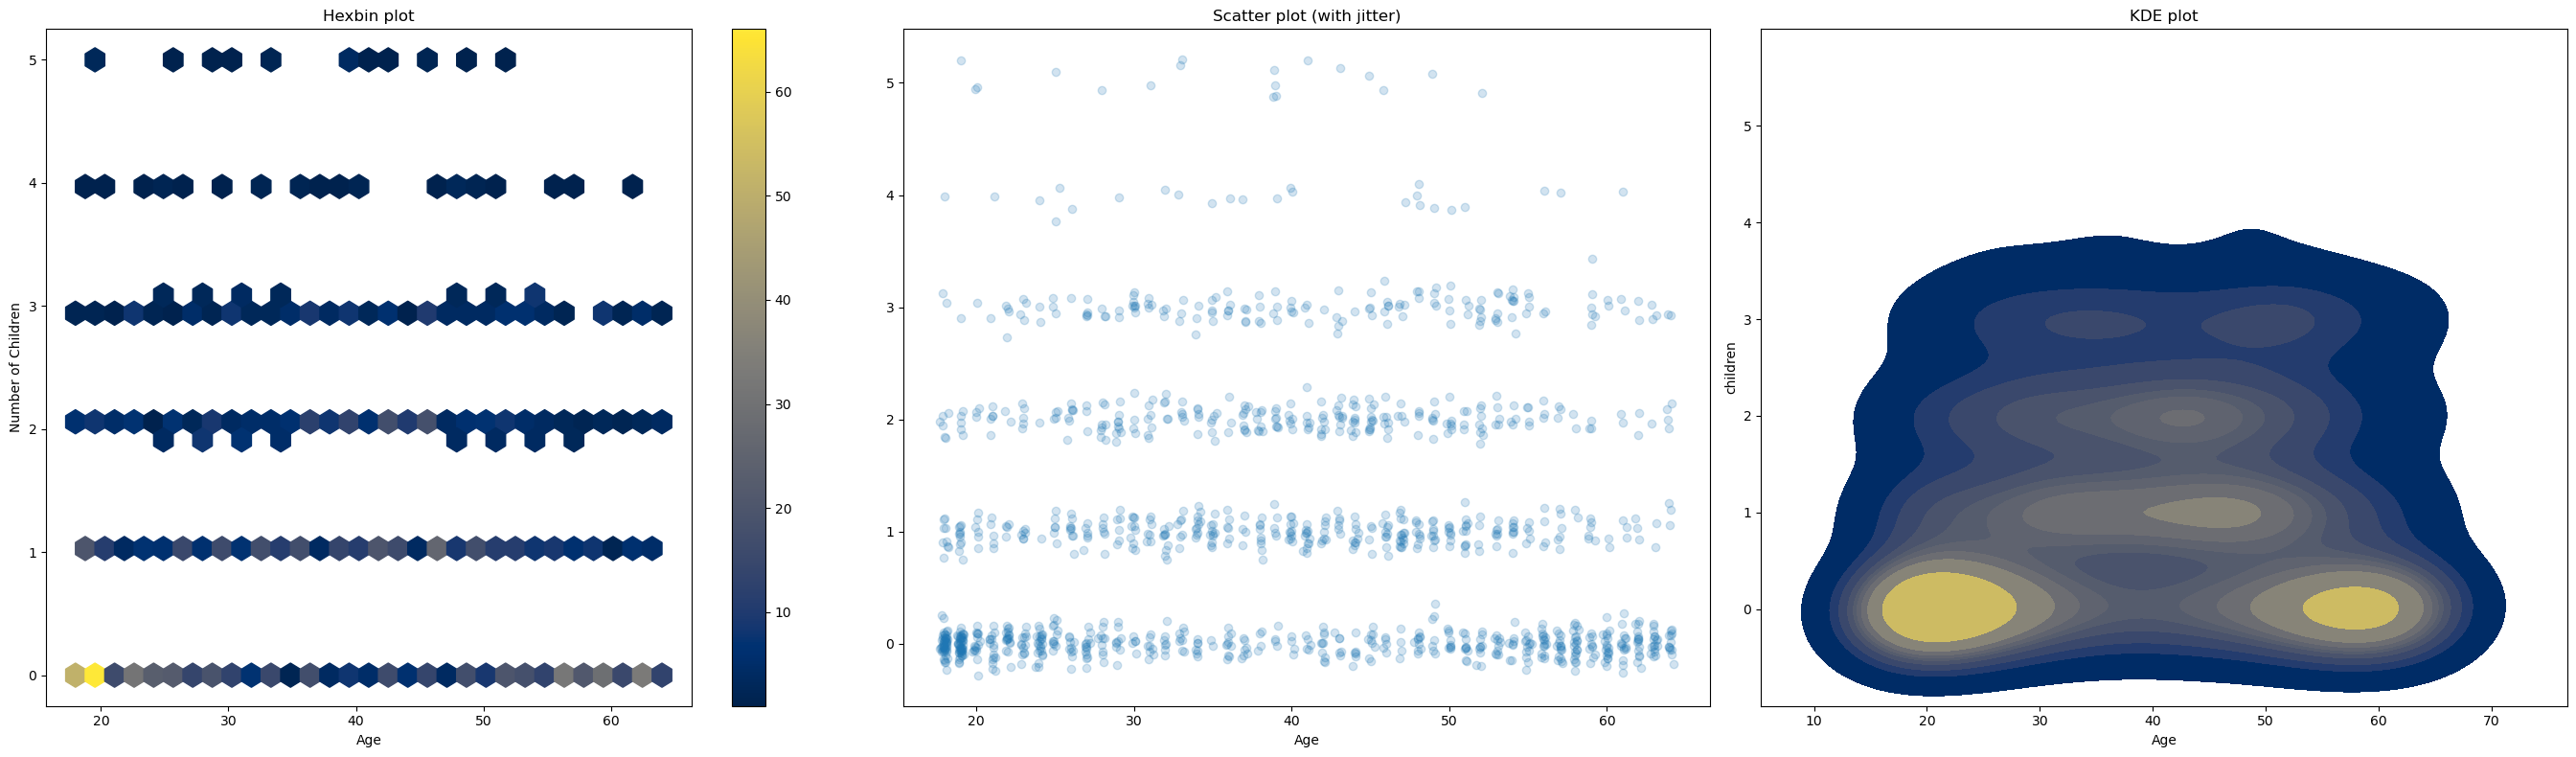

In [95]:
# Create a figure and three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 8))

# Hexbin plot on the first subplot
hb = ax1.hexbin(insurance['age'], insurance['children'], gridsize=30, cmap='cividis', mincnt=1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Children')
ax1.set_title('Hexbin plot')
fig.colorbar(hb, ax=ax1)

# Scatter plot with jitter on the second subplot
jitter_strength = 0.1  # Adjust this value to increase or decrease jitter
jittered_age = insurance['age'] + np.random.normal(0, jitter_strength, size=len(insurance))
jittered_children = insurance['children'] + np.random.normal(0, jitter_strength, size=len(insurance))
ax2.scatter(jittered_age, jittered_children, alpha=0.2)
ax2.set_xlabel('Age')
ax2.set_title('Scatter plot (with jitter)')

# KDE plot on the third subplot
sns.kdeplot(x='age', y='children', data=insurance, ax=ax3, cmap='cividis', fill=True)
ax3.set_xlabel('Age')
ax3.set_title('KDE plot')

# Set y-axis limits and ticks for the KDE plot
ax3.set_ylim(-1, 6)
ax3.set_yticks(range(6))

# Adjust the padding between and around subplots
plt.tight_layout()

# Show plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The analysis reveals two primary concentrations of individuals with no children: one around the age range of 18 to 28 years, and another approximately between 54 and 61 years.<br>
Furthermore, the data indicates that very few individuals have four or five children.
</div>

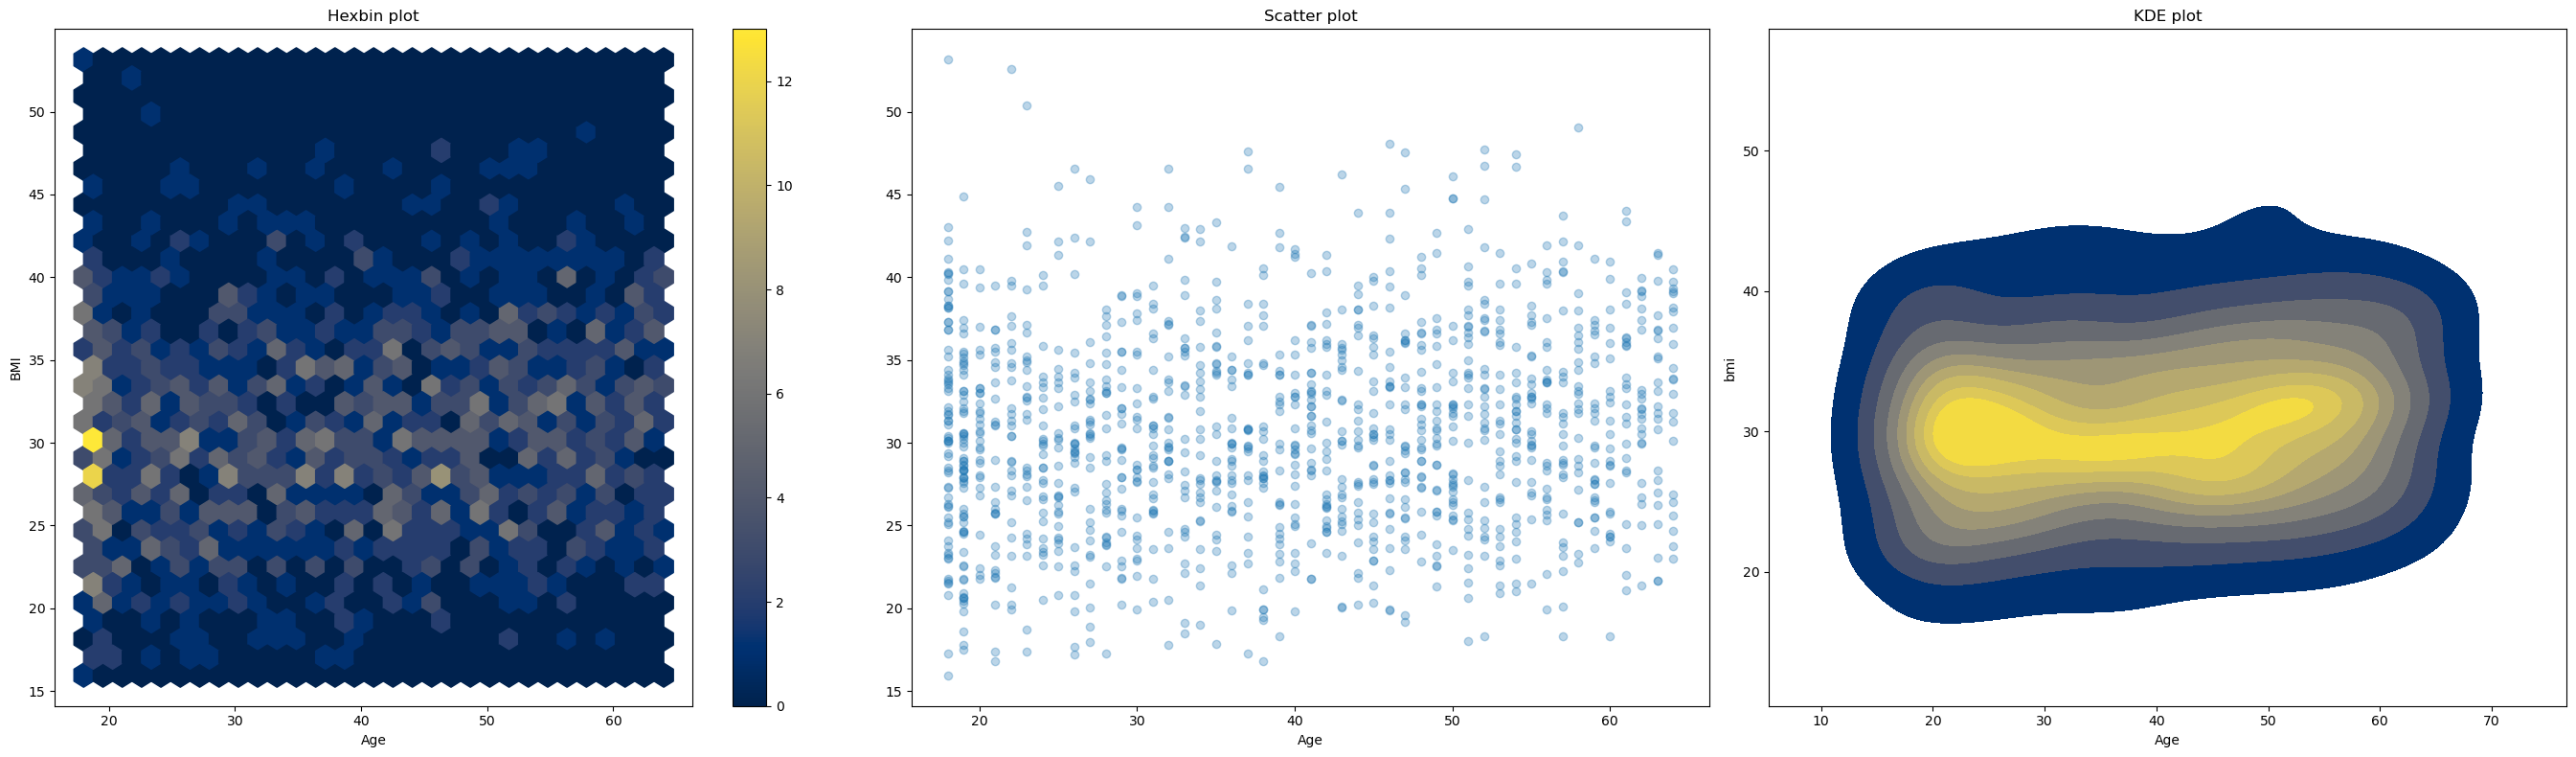

In [96]:
# Create a figure and three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 8))

# Hexbin plot on the first subplot
hb = ax1.hexbin(insurance['age'], insurance['bmi'], gridsize=30, cmap='cividis')
ax1.set_xlabel('Age')
ax1.set_ylabel('BMI')
ax1.set_title('Hexbin plot')
fig.colorbar(hb, ax=ax1)

# Scatter plot on the second subplot
ax2.scatter(insurance['age'], insurance['bmi'], alpha=0.3)
ax2.set_xlabel('Age')
ax2.set_title('Scatter plot')

# KDE plot on the third subplot
sns.kdeplot(data=insurance, x='age', y='bmi', ax=ax3, cmap='cividis', fill=True)
ax3.set_xlabel('Age')
ax3.set_title('KDE plot')

# Adjust the padding between and around subplots
plt.tight_layout()
# Show the plots
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The BMI distribution mainly ranges from 25 to 35 across all ages.
</div>

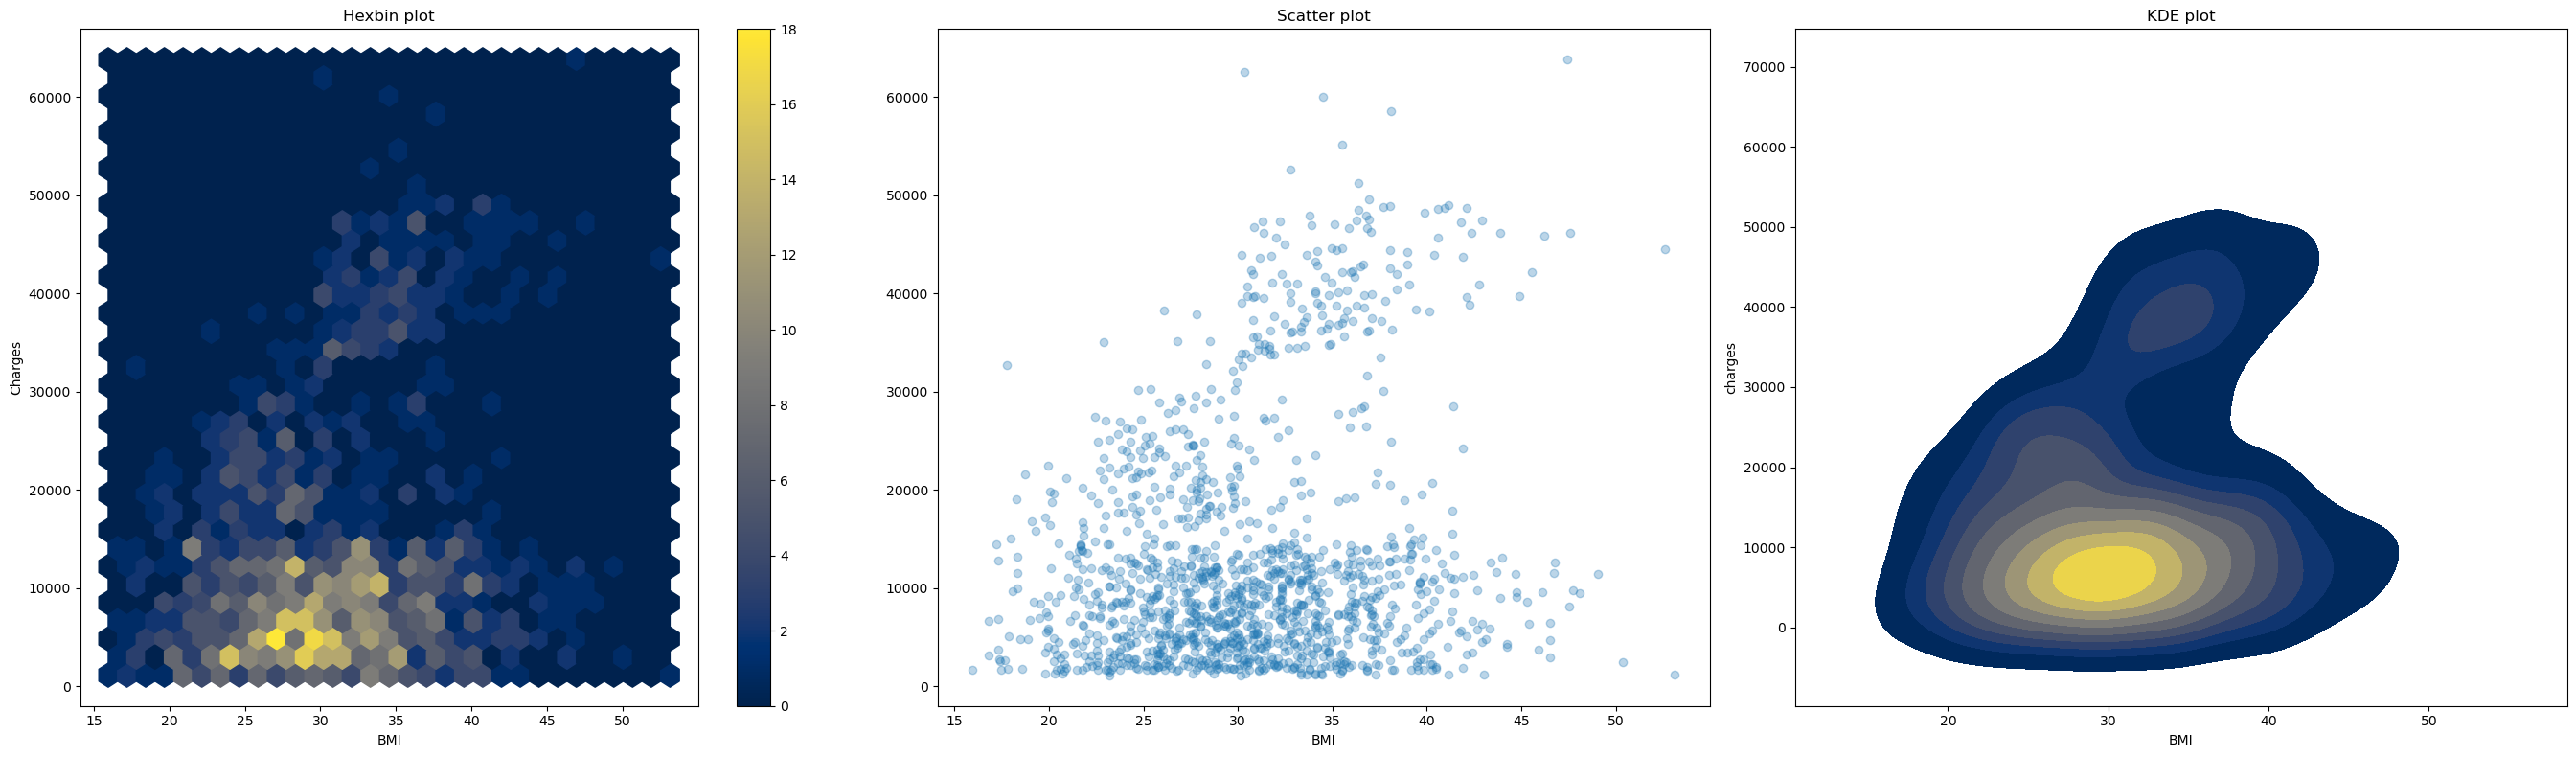

In [97]:
# Create a figure and three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 8))

# Hexbin plot on the first subplot
hb = ax1.hexbin(insurance['bmi'], insurance['charges'], gridsize=30, cmap='cividis')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Charges')
ax1.set_title('Hexbin plot')
fig.colorbar(hb, ax=ax1)

# Scatter plot on the second subplot
ax2.scatter(insurance['bmi'], insurance['charges'], alpha=0.3)
ax2.set_xlabel('BMI')
ax2.set_title('Scatter plot')

# KDE plot on the third subplot
sns.kdeplot(data=insurance, x='bmi', y='charges', ax=ax3, cmap='cividis', fill=True)
ax3.set_xlabel('BMI')
ax3.set_title('KDE plot')

# Adjust the padding between and around subplots
plt.tight_layout()
# Show the plots
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
A broad range of BMI values, from around 20 to 40, shows approximately the same insurance costs for individuals.<br>
A less prominent range, from around 31 to 36 BMI, indicates significantly higher insurance costs.<br>
Overall, it seems that BMI does not have a strong impact on insurance costs.
</div>

## Comprehensive Analysis of Factors Affecting Cost

<div class="alert alert-info">
To evaluate the impact of the smoker variable on insurance costs, we will begin by organizing our data. <br>
Sorting the data by age will facilitate a more effective analysis.
</div>

In [98]:
# Sort the dataframe first by 'age', then by 'smoker', and finally by 'bmi'
sorted_insurance_age_smoker_bmi = insurance.sort_values(by=['age', 'smoker', 'bmi'])
# Display the sorted dataframe
display(sorted_insurance_age_smoker_bmi.head(25))

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.796400
359,18,female,20.790,0,no,southeast,1607.510100
1212,18,male,21.470,0,no,northeast,1702.455300
1080,18,male,21.780,2,no,southeast,11884.048580
295,18,male,22.990,0,no,northeast,1704.568100
1041,18,male,23.085,0,no,northeast,1704.700150
940,18,male,23.210,0,no,southeast,1121.873900
1023,18,male,23.320,1,no,southeast,1711.026800
121,18,male,23.750,0,no,northeast,1705.624500
469,18,female,24.090,1,no,southeast,2201.097100


<div class="alert alert-block alert-success">
The results indicate potential outliers, with some individuals having insurance costs dramatically higher than their peers.<br>
This raises the possibility of hidden variables or biases that may not have been accounted for in the data.
</div>

<div class="alert alert-info">
We will proceed with further analysis, now using the 'charges' column as the sorting factor.
</div>

In [99]:
# Sort the dataframe by the 'charges' column
sorted_insurance_charges = insurance.sort_values(by=['charges'])
# Display the sorted datafrane
display(sorted_insurance_charges.head(25))

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110
194,18,male,34.43,0,no,southeast,1137.4697
866,18,male,37.29,0,no,southeast,1141.4451
781,18,male,41.14,0,no,southeast,1146.7966
442,18,male,43.01,0,no,southeast,1149.3959
1317,18,male,53.13,0,no,southeast,1163.4627


<div class="alert alert-block alert-success">
The 'sex' variable appears to have some impact on insurance costs, as the first female individual is observed only in the 25th row.
</div>

### Visualizing Multivariate Numerical Data

<div class="alert alert-info">
Using a multivariate scatter plot to evaluate potential differences in charges per individual based on age, with sex as a third dimension.
</div>

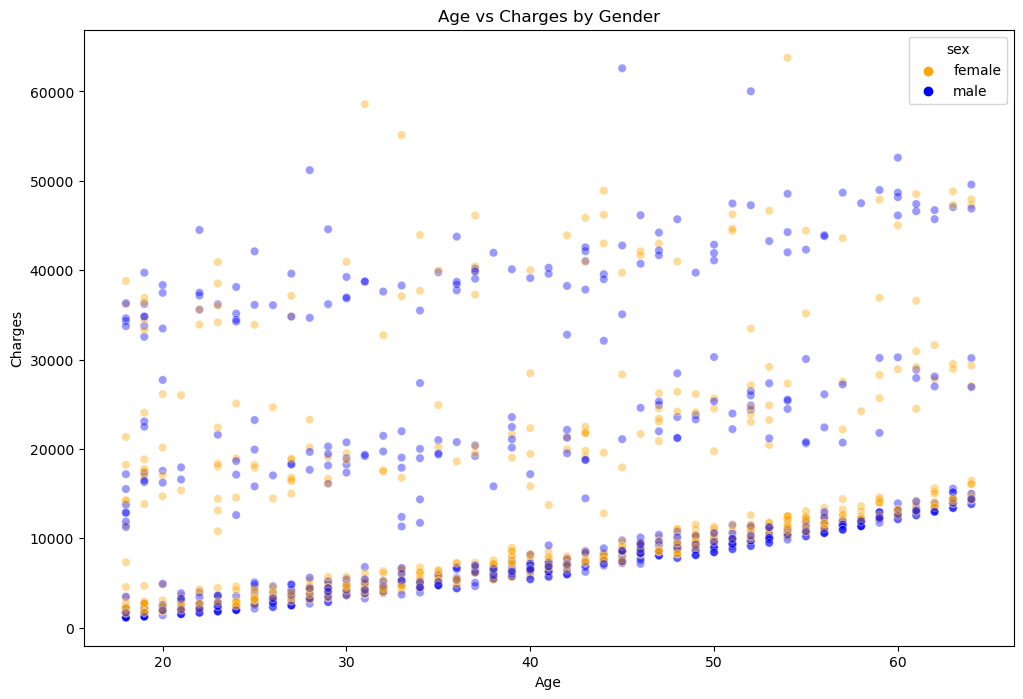

In [100]:
# Create a scatter plot with seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=insurance, x='age', y='charges', hue='sex', palette={'male': 'blue', 'female': 'orange'}, alpha=0.4)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges by Gender')

# Show the plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The graph shows a clear relationship between cost and age, with costs increasing as individuals get older.<br>
Additionally, the sex variable does not appear to significantly impact insurance costs.
</div>

<div class="alert alert-info">
Using a multivariate scatter plot to evaluate potential differences in charges per individual based on age, with BMI as a third dimension.
</div>

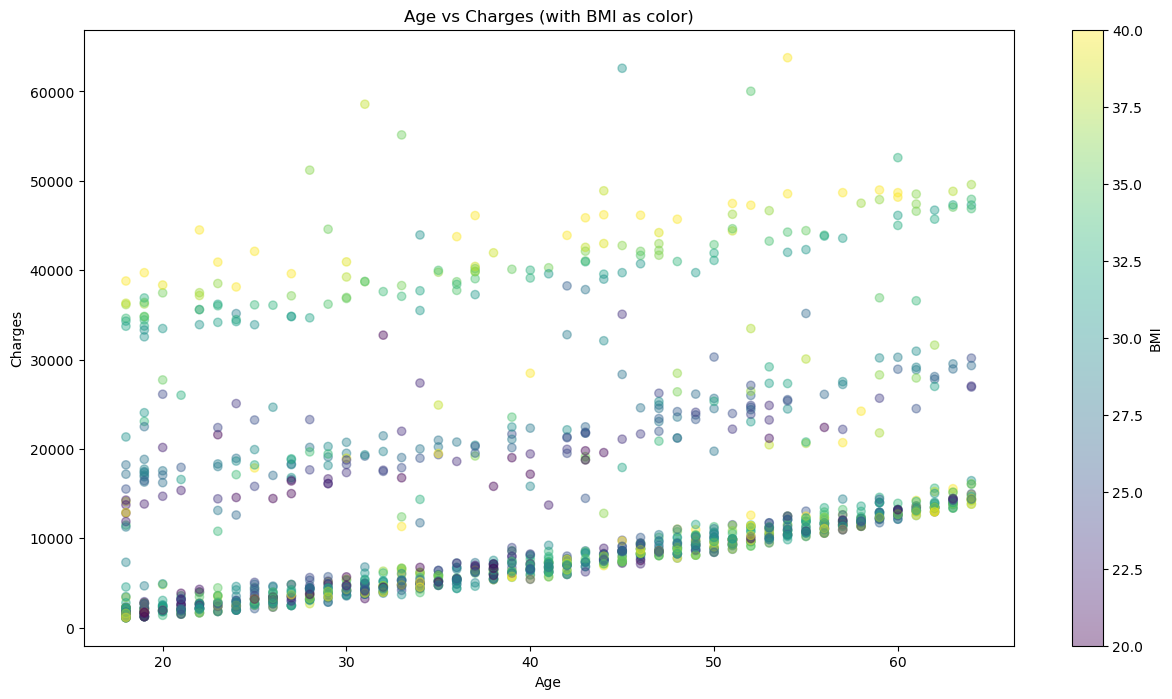

In [101]:
# Create a figure for the scatter plot
plt.figure(figsize=(15, 8))

# Scatter plot with age represented by color
scatter = plt.scatter(insurance['age'], insurance['charges'], c=insurance['bmi'], cmap='viridis', alpha=0.4, vmin=20, vmax=40) # Limiting the BMI between 20 and 45, as there are few people outside this range
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges (with BMI as color)')
plt.colorbar(scatter, label='BMI')

# Show the plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
There is no clear impact of BMI on cost.
</div>

<div class="alert alert-info">
Using a multivariate scatter plot to evaluate potential differences in charges per individual based on age, with smoker as a third dimension.
</div>

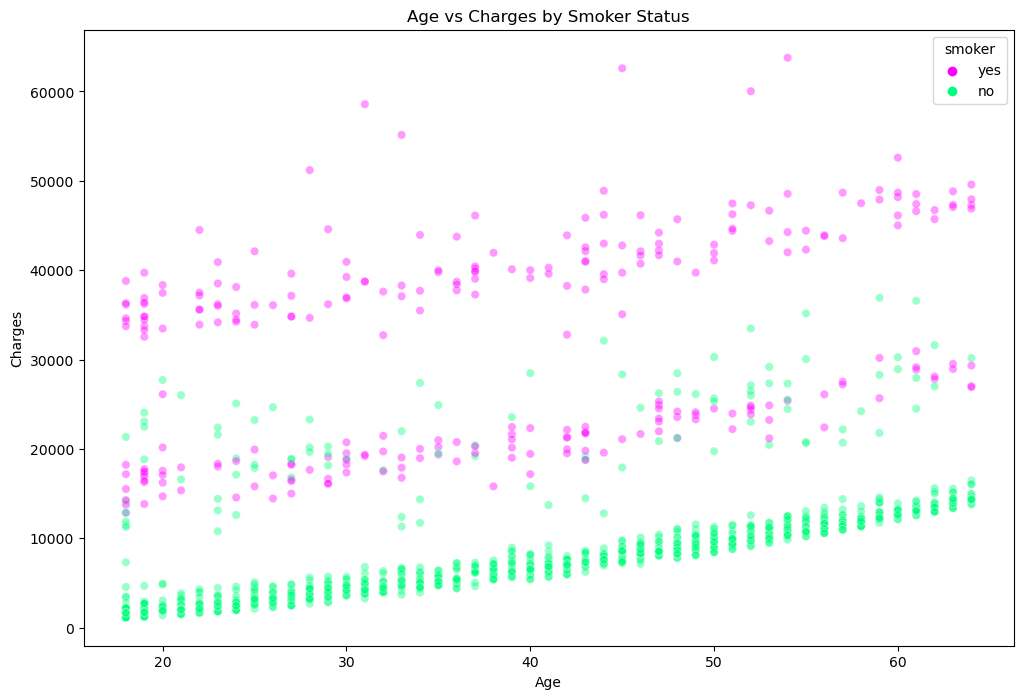

In [102]:
# Create a scatter plot with seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=insurance, x='age', y='charges', hue='smoker', palette={'yes': 'fuchsia', 'no': 'springgreen'}, alpha=0.4)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges by Smoker Status')

# Show the plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Smoking is a decisive factor. The graph shows a clear mean line at the bottom, composed entirely of non-smokers.<br>
Insurance costs for smokers are significantly higher than for non-smokers — approximately $10,000 more for individuals of the same age.<br>
Additionally, two distinct means are visible: one starting at age 18 with a cost around $15,000 and ending at age 64 with a cost around $28,000, and another starting at age 18 with a cost around $35,000 and ending at age 64 with a cost around $48,000.<br>
Many outliers are observed among both smokers and non-smokers.
</div>

<div class="alert alert-info">
Using a multivariate scatter plot to evaluate potential differences in charges per individual based on BMI, with age as a third dimension.
</div>

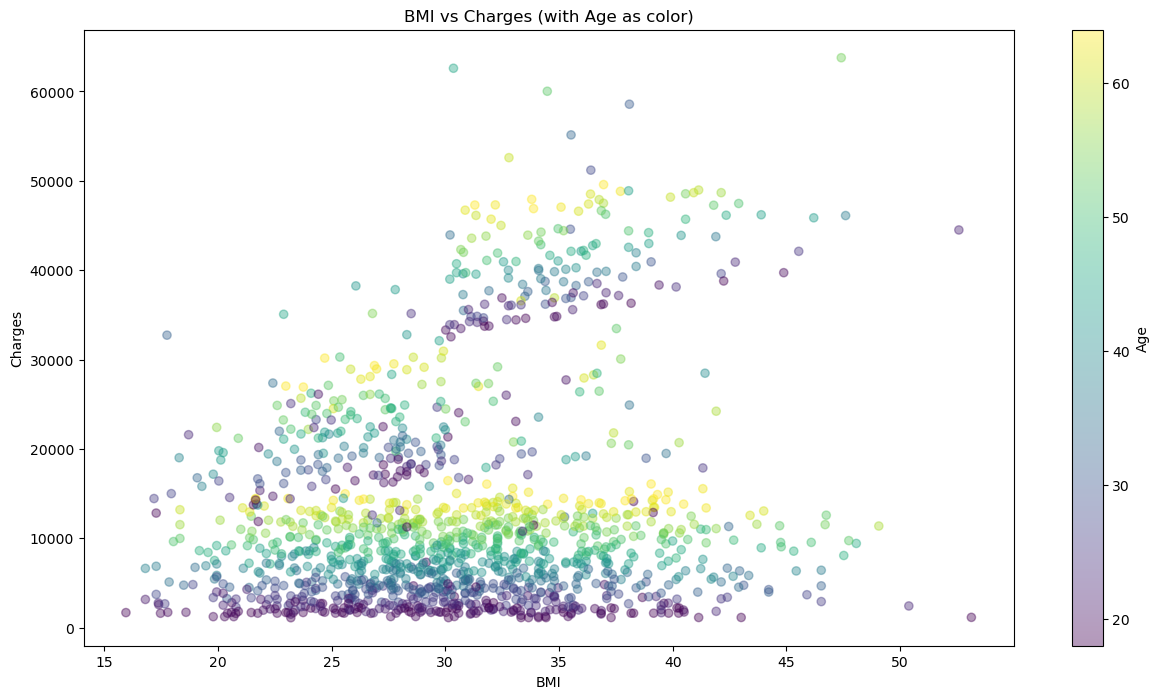

In [103]:
# Create a figure for the scatter plot
plt.figure(figsize=(15, 8))

# Scatter plot with age represented by color
scatter = plt.scatter(insurance['bmi'], insurance['charges'], c=insurance['age'], cmap='viridis', alpha=0.4)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (with Age as color)')
plt.colorbar(scatter, label='Age')

# Show the plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
The age hue in the scatter plot again highlights the impact of age on cost, as evidenced by the clear horizontal lines of consistent colors from the `viridis` colormap, indicating a strong correlation between age and cost.<br>
There remains no clear relationship between cost and BMI, as insurance costs vary widely across different BMI values.
</div>

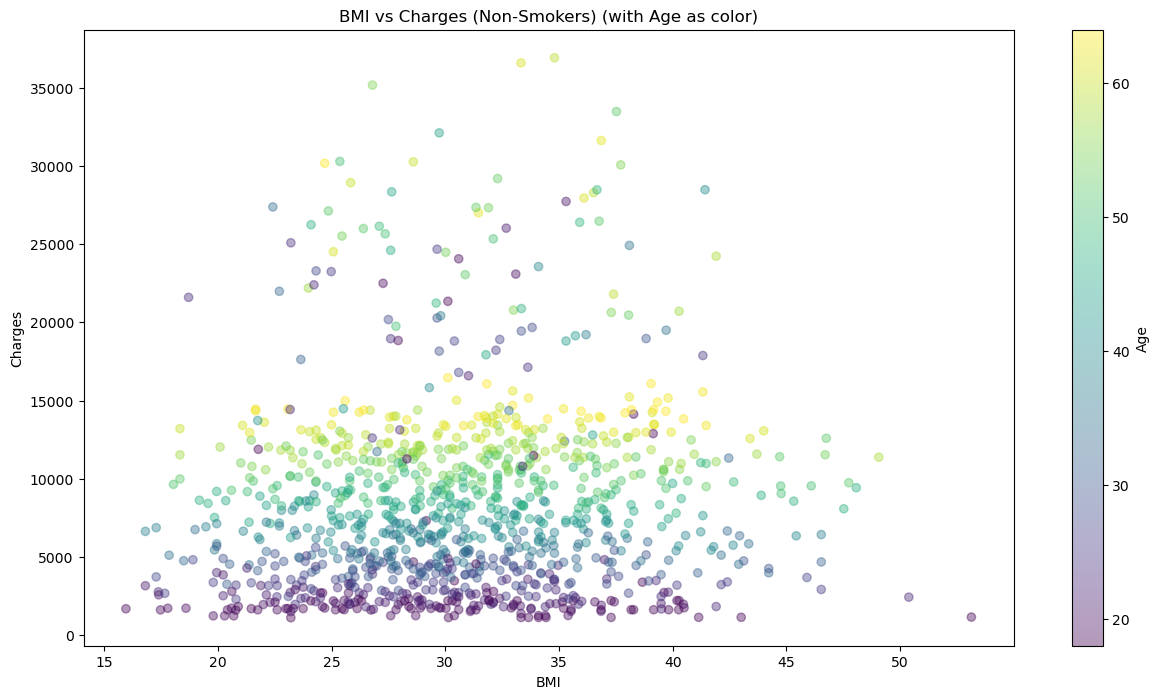

In [104]:
# Make a copy of the insurance dataframe
insurance_nonsmokers = insurance.copy()
# Filter so the dataframe only has non-smokers
insurance_nonsmokers = insurance_nonsmokers[insurance_nonsmokers['smoker'] == 'no']

# Create a figure for the scatter plot
plt.figure(figsize=(15, 8))

# Scatter plot with age represented by color
scatter = plt.scatter(insurance_nonsmokers['bmi'], insurance_nonsmokers['charges'], c=insurance_nonsmokers['age'], cmap='viridis', alpha=0.4)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (Non-Smokers) (with Age as color)')
plt.colorbar(scatter, label='Age')

# Show the plot
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Once more, there is no distinct correlation between BMI and insurance costs, as the costs fluctuate significantly across various BMI levels.
</div>

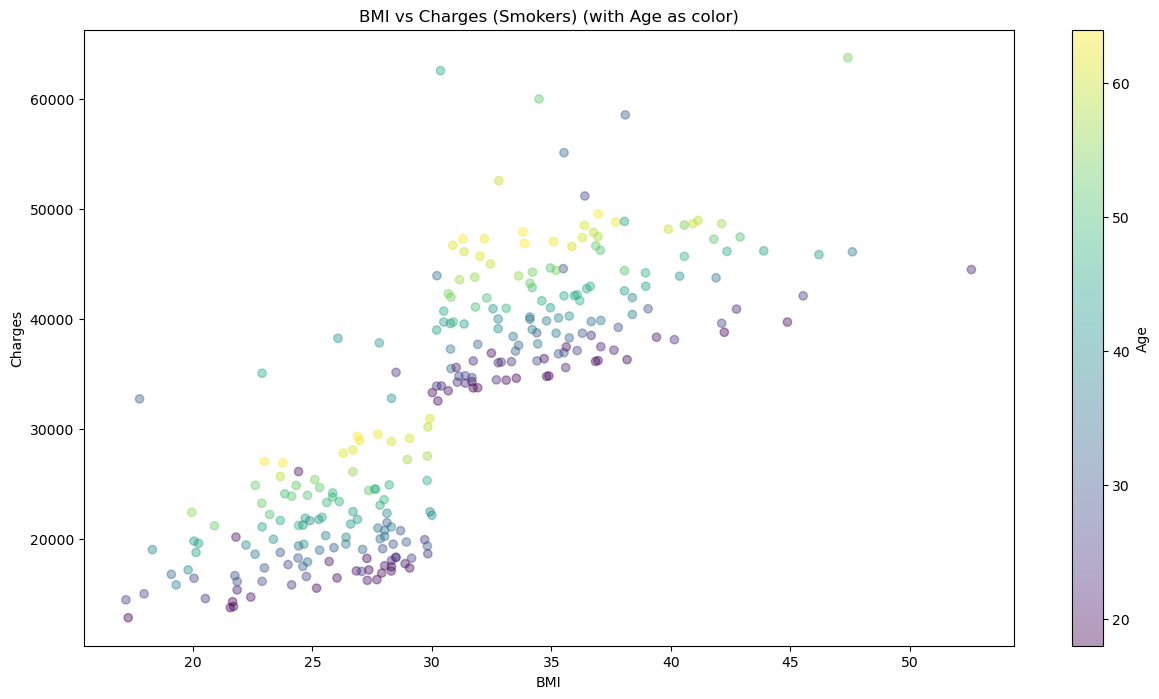

In [105]:
# Make a copy of the insurance dataframe
insurance_smokers = insurance.copy()
# Filter so the dataframe only has smokers
insurance_smokers = insurance_smokers[insurance_smokers['smoker'] == 'yes']

# Create a figure for the scatter plot
plt.figure(figsize=(15, 8))

# Scatter plot with age represented by color
scatter = plt.scatter(insurance_smokers['bmi'], insurance_smokers['charges'], c=insurance_smokers['age'], cmap='viridis', alpha=0.4)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (Smokers) (with Age as color)')
plt.colorbar(scatter, label='Age')

# Show the plot
plt.show()
# Close the figure to free resources
plt.close()

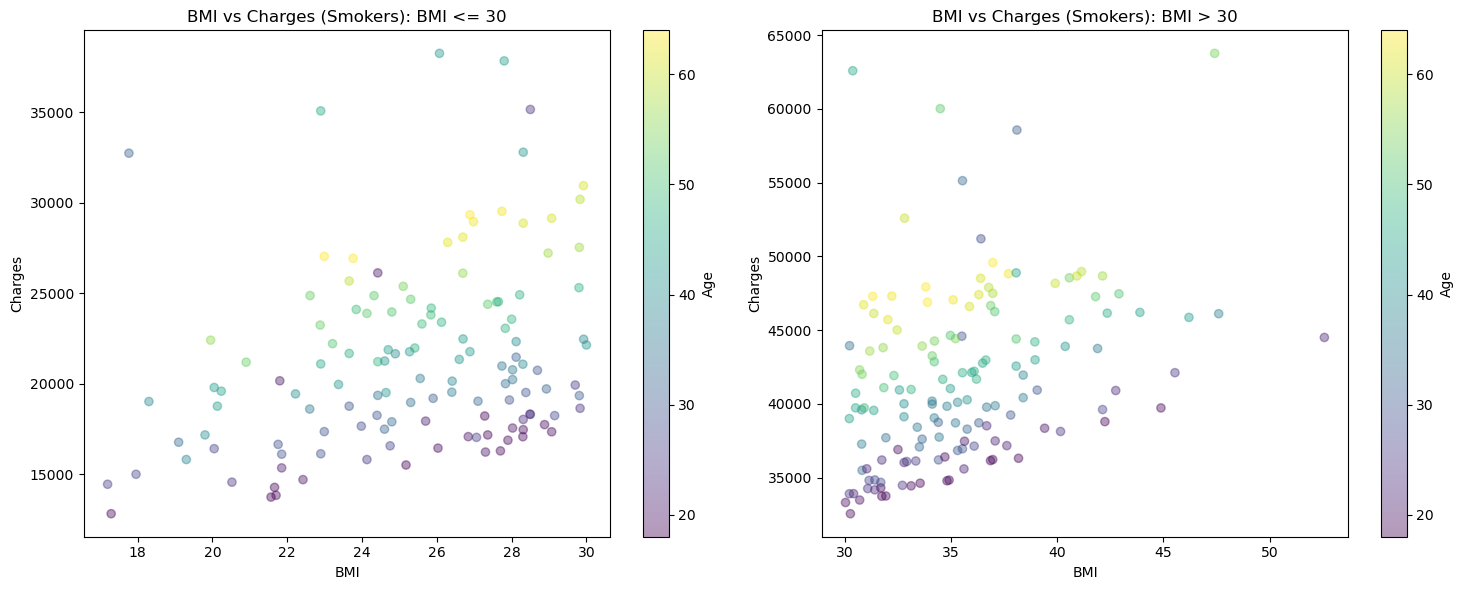

In [106]:
# Create two new dataframes for BMI filtering
insurance_smokers_bmi_under_30 = insurance_smokers[insurance_smokers['bmi'] <= 30]
insurance_smokers_bmi_over_30 = insurance_smokers[insurance_smokers['bmi'] > 30]

# Create a figure for the scatter plots
plt.figure(figsize=(15, 6))

# Scatter plot for smokers with BMI 30 or under
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
scatter1 = plt.scatter(insurance_smokers_bmi_under_30['bmi'],
                        insurance_smokers_bmi_under_30['charges'],
                        c=insurance_smokers_bmi_under_30['age'], 
                        cmap='viridis', alpha=0.4)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (Smokers): BMI <= 30')
plt.colorbar(scatter1, label='Age')

# Scatter plot for smokers with BMI over 30
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
scatter2 = plt.scatter(insurance_smokers_bmi_over_30['bmi'],
                        insurance_smokers_bmi_over_30['charges'],
                        c=insurance_smokers_bmi_over_30['age'], 
                        cmap='viridis', alpha=0.4)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (Smokers): BMI > 30')
plt.colorbar(scatter2, label='Age')

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
A BMI over 30, coupled with smoking, emerges as an important factor contributing to a significant increase in insurance costs, resulting in nearly $15,000 in additional insurance costs when this combination is present.
</div>

### Dealing with Outliers

<div class="alert alert-info">
We will calculate the average cost for each age and then remove any outliers that exceed a certain threshold using the formula: <br>

$n_i > y \cdot \bar{a}_x$<br>

where:
- $\bar{a}_x$ is the average cost for a specific age;
- $n_i$ represents each individual cost value at the same age as $\bar{a}_x$;
- $y$ is a threshold factor.

In this approach, any data points with costs $n_i$ that are greater than $y \cdot \bar{a}_x$ will be excluded.<br>
This method allows us to filter out excessively high values while preserving the main trend of the data.
</div>

In [107]:
# Defining a function that filters outliers
def remove_outliers(dataframe, y):
    # Calculate the average cost for each age
    avg_cost_age = dataframe.groupby('age')['charges'].mean()
    # Create a mask for the entire dataframe
    mask = pd.Series(True, index=dataframe.index)  # Start with all True

    # Iterate over each age
    for age, avg_cost in avg_cost_age.items():
        # Identify outliers based on the threshold
        outliers = dataframe[(dataframe['age'] == age) & (dataframe['charges'] > y * avg_cost)].index
        # Update the mask to exclude outliers
        mask[outliers] = False

    # Return a new dataframe without outliers
    return dataframe[mask]

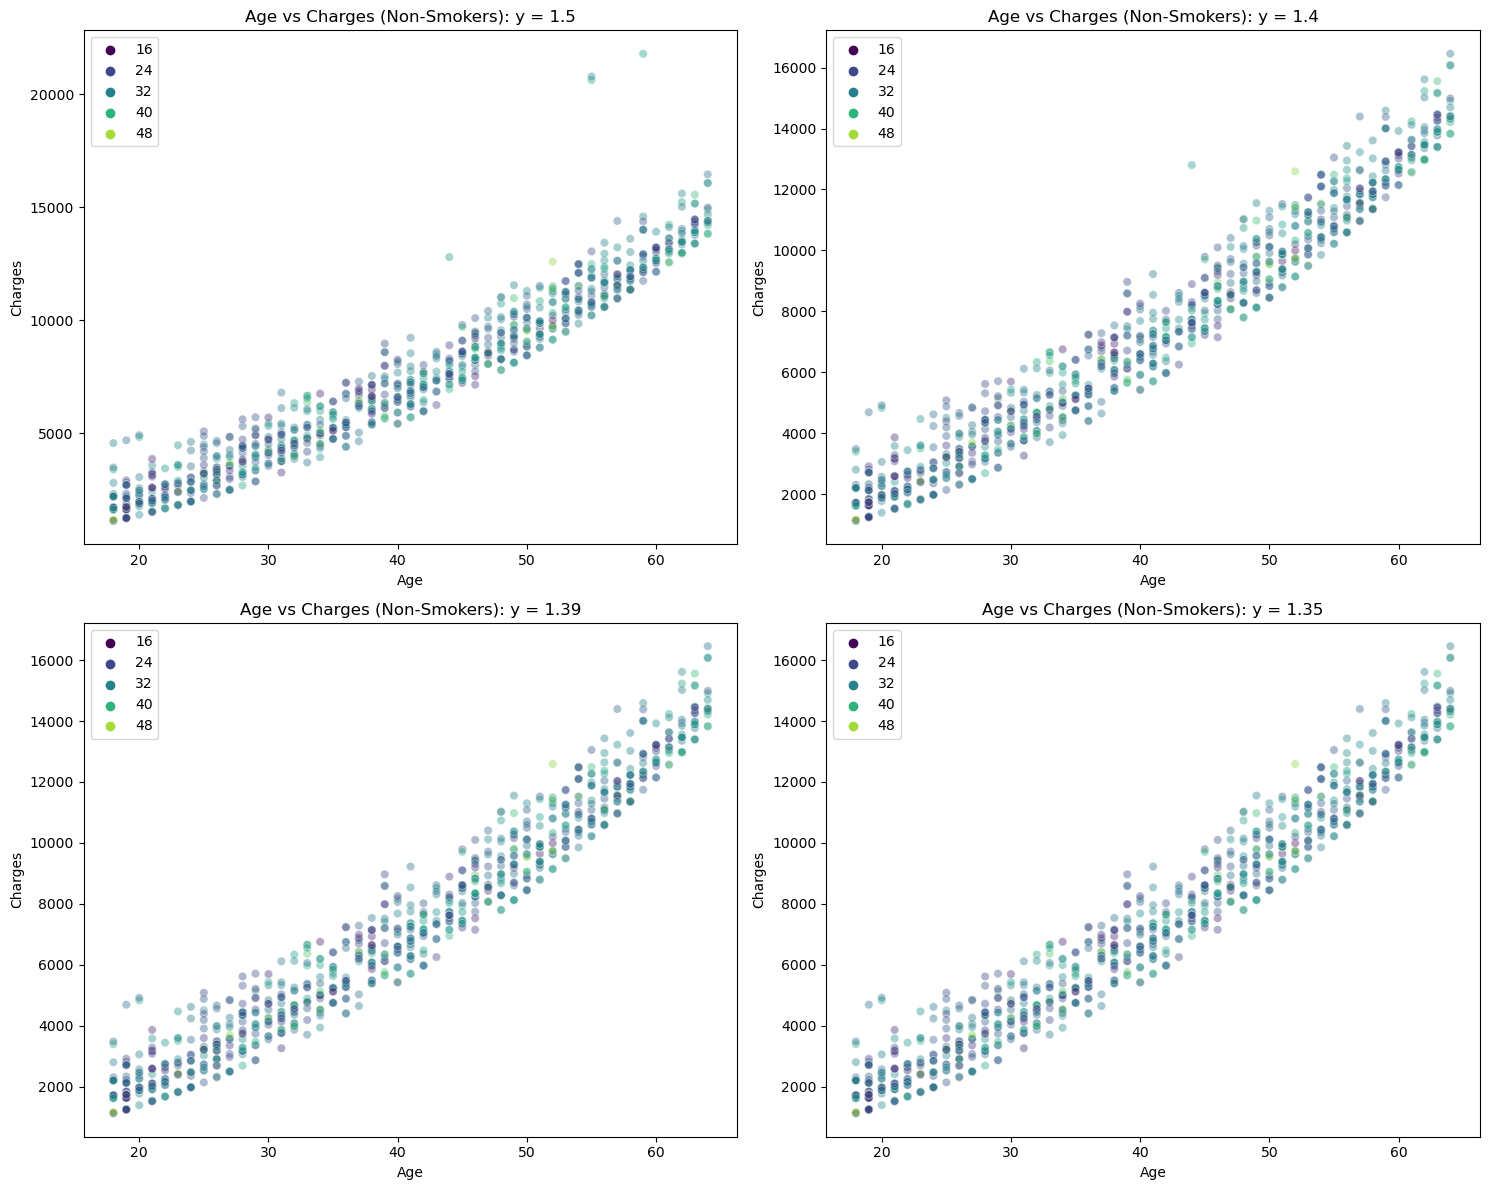

In [108]:
# Test some different 'y' threshold values
y = [1.5, 1.4, 1.39, 1.35]

# Create a figure for the subplots
plt.figure(figsize=(15, 12))

# Loop through the thresholds and create subplots
for index, threshold in enumerate(y):
    # Make a copy of the original dataframe for each threshold
    temp_insurance_nonsmokers = insurance_nonsmokers.copy()

    # Apply the function to remove outliers
    temp_insurance_nonsmokers = remove_outliers(temp_insurance_nonsmokers, threshold)

    # Create a subplot in the 2x2 grid
    plt.subplot(2, 2, index + 1)  # 2 rows, 2 columns, subplot index starts at 1
    sns.scatterplot(data=temp_insurance_nonsmokers, x='age', y='charges', hue='bmi', palette='viridis', alpha=0.4)

    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title(f'Age vs Charges (Non-Smokers): y = {threshold}')

    # Move the legend to the top left corner
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Based on the analysis, a threshold of <code>y = 1.39</code> appears to be the most effective for the non-smokers dataframe. It removes values that deviate significantly from the mean without compromising the integrity of the main dataset.
</div>

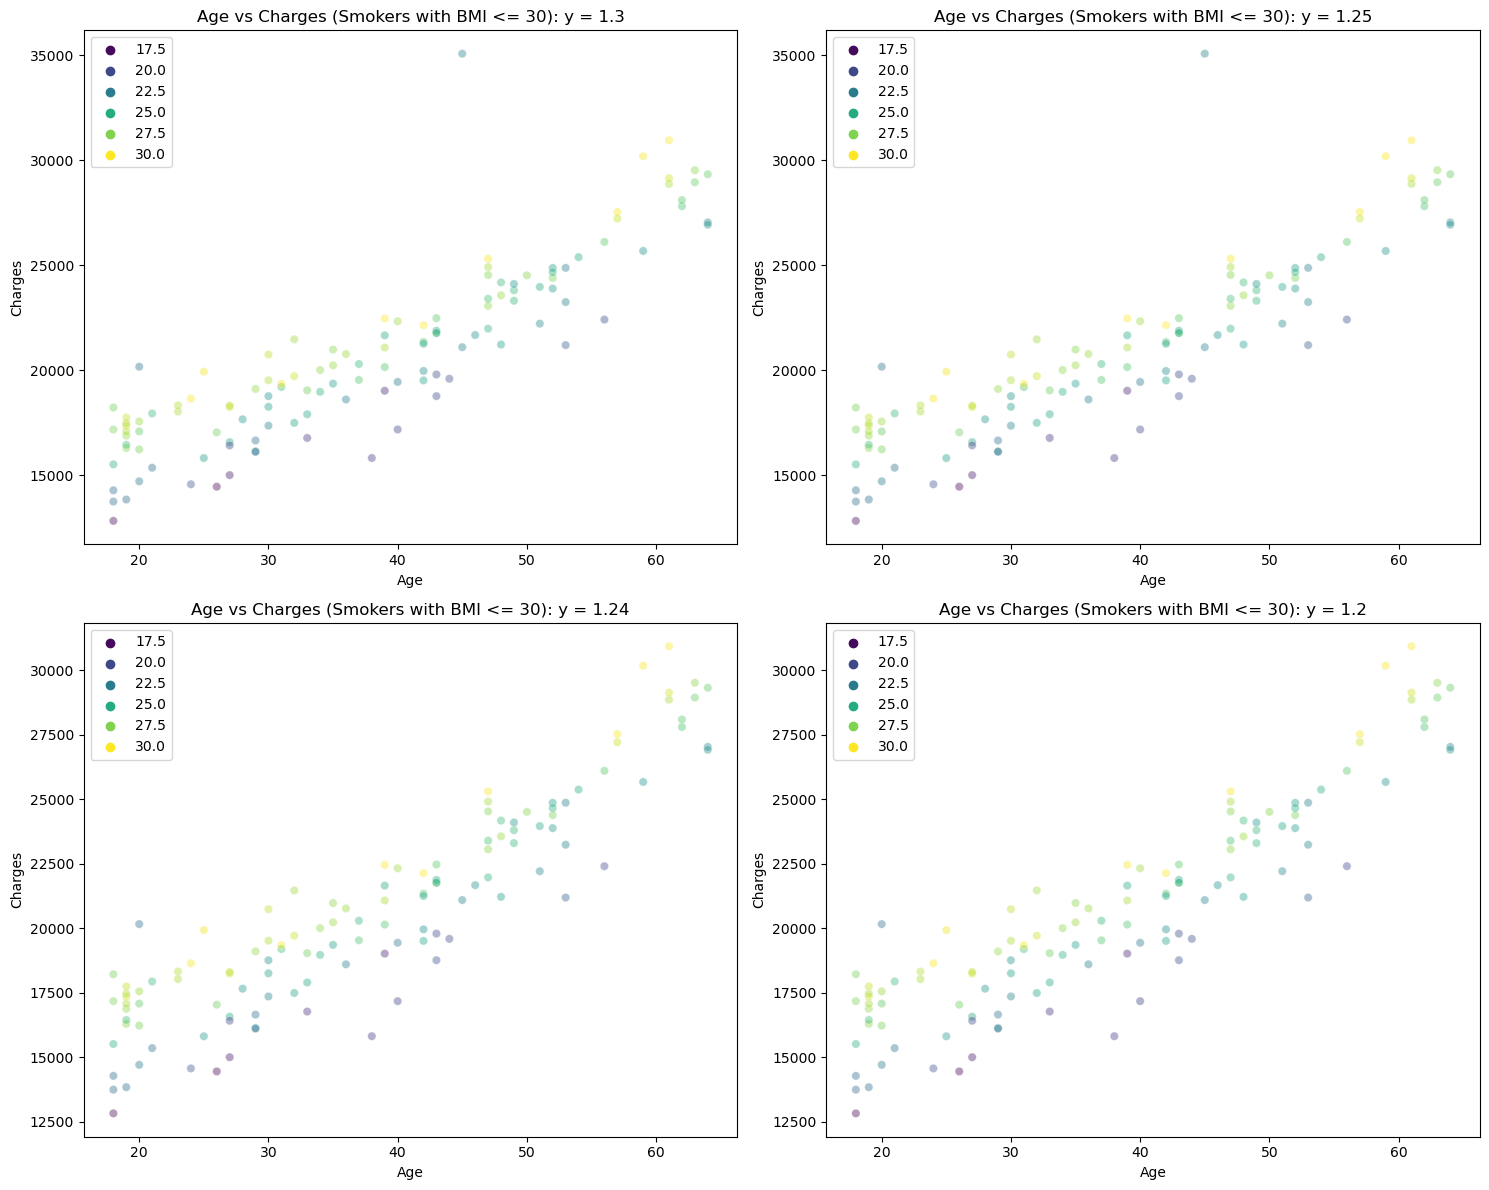

In [109]:
# Test some different 'y' threshold values
y = [1.3, 1.25, 1.24, 1.2]

# Create a figure for the subplots
plt.figure(figsize=(15, 12))

# Loop through the thresholds and create subplots
for index, threshold in enumerate(y):
    # Make a copy of the original dataframe for each threshold
    temp_insurance_smokers_bmi_under_30 = insurance_smokers_bmi_under_30.copy()

    # Apply the function to remove outliers
    temp_insurance_smokers_bmi_under_30 = remove_outliers(temp_insurance_smokers_bmi_under_30, threshold)

    # Create a subplot in the 2x2 grid
    plt.subplot(2, 2, index + 1)  # 2 rows, 2 columns, subplot index starts at 1
    sns.scatterplot(data=temp_insurance_smokers_bmi_under_30, x='age', y='charges', hue='bmi', palette='viridis', alpha=0.4)

    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title(f'Age vs Charges (Smokers with BMI <= 30): y = {threshold}')

    # Move the legend to the top left corner
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
A threshold of <code>y = 1.24</code> seems to be the most effective for the dataframe of smokers with a BMI of 30 or below.
</div>

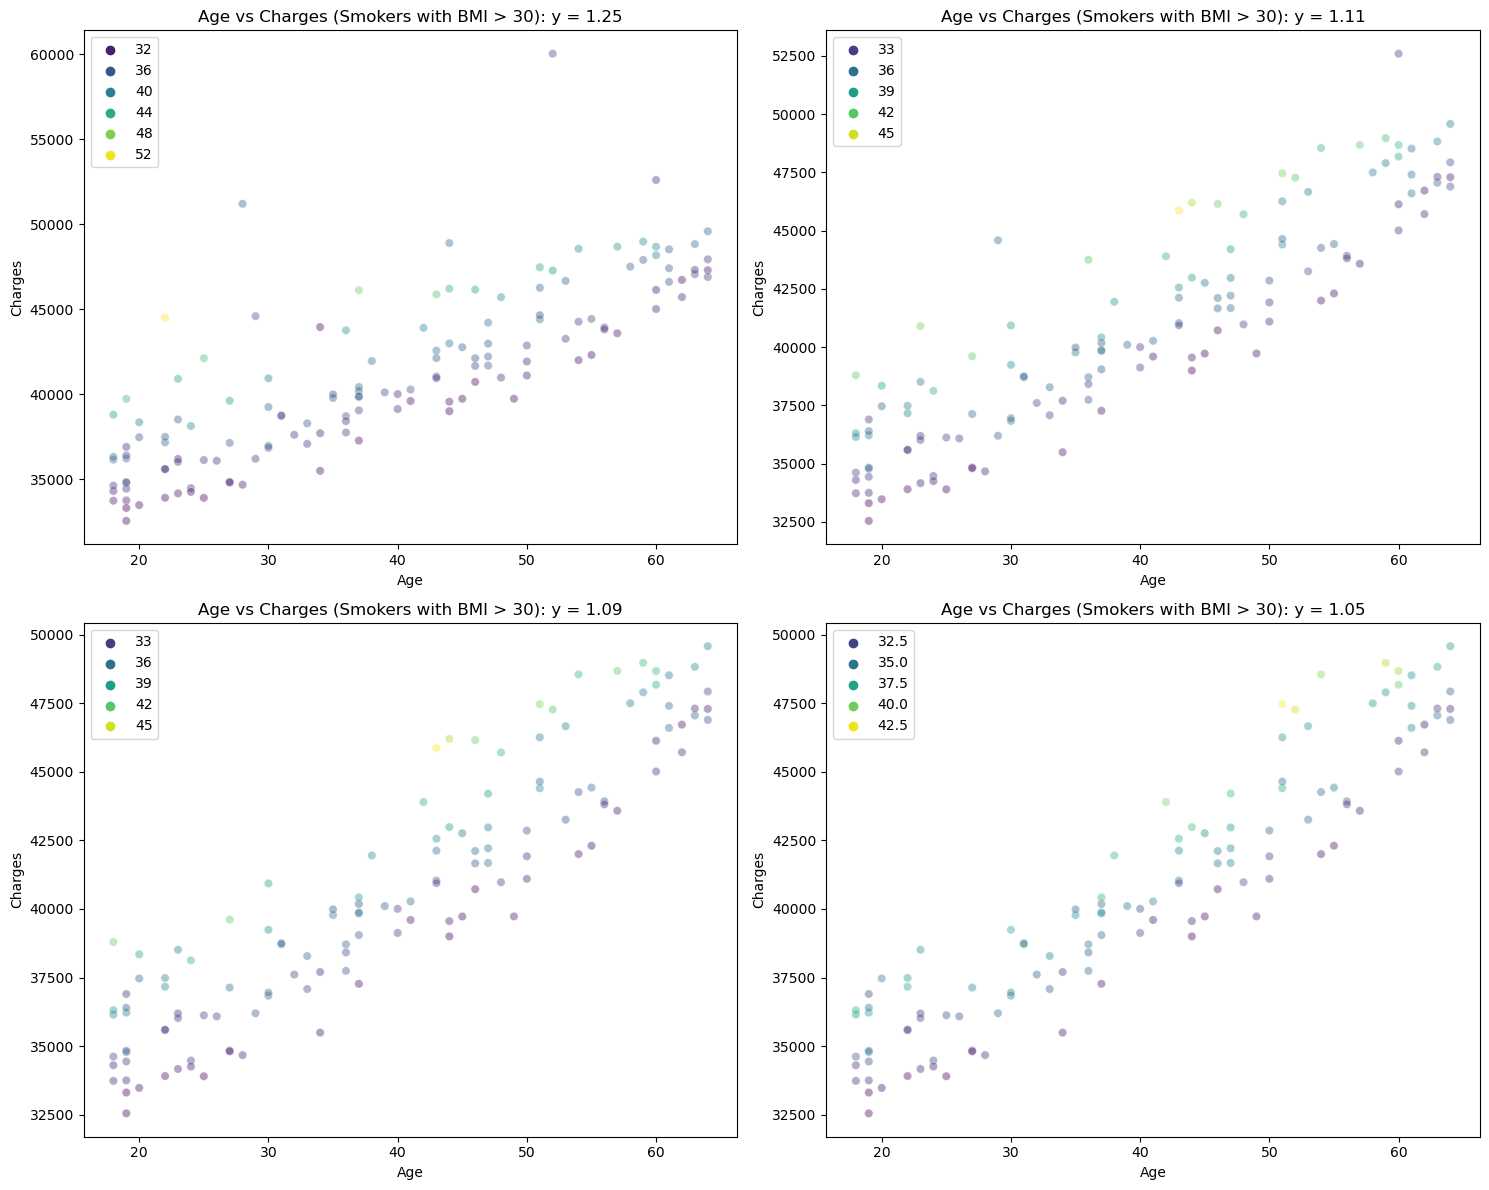

In [110]:
# Test some different 'y' threshold values
y = [1.25, 1.11, 1.09, 1.05]

# Create a figure for the subplots
plt.figure(figsize=(15, 12))

# Loop through the thresholds and create subplots
for index, threshold in enumerate(y):
    # Make a copy of the original dataframe for each threshold
    temp_insurance_smokers_bmi_over_30 = insurance_smokers_bmi_over_30.copy()

    # Apply the function to remove outliers
    temp_insurance_smokers_bmi_over_30 = remove_outliers(temp_insurance_smokers_bmi_over_30, threshold)

    # Create a subplot in the 2x2 grid
    plt.subplot(2, 2, index + 1)  # 2 rows, 2 columns, subplot index starts at 1
    sns.scatterplot(data=temp_insurance_smokers_bmi_over_30, x='age', y='charges', hue='bmi', palette='viridis', alpha=0.4)

    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title(f'Age vs Charges (Smokers with BMI > 30): y = {threshold}')

    # Move the legend to the top left corner
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
A threshold of <code>y = 1.09</code> seems to be the most effective for the dataframe of smokers with a BMI above 30.
</div>

## Multi-layer Perceptron Regressor (MLPRegressor)

<div class="alert alert-info">
Now, we will train a Multi-layer Perceptron Regressor (MLPRegressor) neural network using both the original dataframe and the dataframe with outliers filtered out.
</div>

### Dataset Preparation

In [111]:
# Filter the outliers
insurance_nonsmokers = remove_outliers(insurance_nonsmokers, 1.39)
insurance_smokers_bmi_under_30 = remove_outliers(insurance_smokers_bmi_under_30, 1.24)
insurance_smokers_bmi_over_30 = remove_outliers(insurance_smokers_bmi_over_30, 1.09)

# Create the insurance dataframe with outliers filtered out
insurance_filtered = pd.concat([insurance_nonsmokers, insurance_smokers_bmi_under_30, insurance_smokers_bmi_over_30], ignore_index=True)

# Make a copy of the insurance dataframe
insurance_filtered_integer = insurance_filtered.copy()

# Convert 'sex', 'smoker', and 'region' to numeric codes
insurance_filtered_integer['sex'].replace({'female': 0, 'male': 1}, inplace=True)
insurance_filtered_integer['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
insurance_filtered_integer['region'].replace({'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3}, inplace=True)

# Note: 'insurance_integer' is the original dataframe, 
# 'insurance_filtered_integer' is the dataframe without outliers, 
# both with categorical columns' values converted to numeric codes.

# Print the size of each dataframe
print(f'insurance_integer: {insurance_integer.shape}')
print(f'insurance_filtered_integer: {insurance_filtered_integer.shape}')

insurance_integer: (1337, 7)
insurance_filtered_integer: (1210, 7)


<div class="alert alert-block alert-success">
We now have two dataframes: the original dataset and the outlier-filtered dataset.<br>
Both have undergone conversion of categorical column values to numerical codes.
</div>

### Feature and Target Variable Separation

In [112]:
# Exclusion of the 'charges' variable from the input features
x_original = insurance_integer.drop('charges', axis=1)
x_filtered = insurance_filtered_integer.drop('charges', axis=1)
# Inclusion of the 'charges' variable in the desired output vector
y_original = insurance_integer['charges']
y_filtered = insurance_filtered_integer['charges']
# Normalization of the 'charges' variable to ensure all variables are on the same scale
maxY_original = y_original.max()
maxY_filtered = y_filtered.max()
y_original = y_original / maxY_original
y_filtered = y_filtered / maxY_filtered

# Data standardization
scaler1 = StandardScaler().fit(x_original)  # Creates the first model for fitting
scaler2 = StandardScaler().fit(x_filtered)  # Creates the second model for fitting

# Applying standardization
x_original = scaler1.transform(x_original)  # Applies standardization to the 'x' of the original dataset
x_filtered = scaler2.transform(x_filtered)  # Applies standardization to the 'x' of the filtered dataset

# Splitting the dataset into training and testing samples, allocating 30% of the data for testing
o_trainX, o_testX, o_trainY, o_testY = train_test_split(x_original, y_original, test_size=0.3)
f_trainX, f_testX, f_trainY, f_testY = train_test_split(x_filtered, y_filtered, test_size=0.3)

<div class="alert alert-block alert-success">
The dataset has been prepared for model training and testing.<br>
The variable 'charges' has been excluded from the input features, while remaining as the target variable for both original and filtered datasets.<br>
The target variable has been normalized to ensure all variables are on the same scale.<br>
Data standardization has been applied to the input features using the StandardScaler, creating models for both datasets.<br>
Finally, the datasets have been split into training and testing samples, with 30% of the data reserved for testing purposes to evaluate model performance.
</div>

### Model Initialization and Training

In [113]:
# Creation of the first neural network model (MLPRegressor) for the original dataset
mlp_reg_original = MLPRegressor(hidden_layer_sizes=(3), activation='logistic', solver='adam',
                       max_iter=10000, tol=0.0000001, momentum=0.5, early_stopping=True, epsilon=1e-08,
                       n_iter_no_change=100, random_state=0)

# Creation of the second neural network model (MLPRegressor) for the filtered dataset (without outliers)
mlp_reg_filtered = MLPRegressor(hidden_layer_sizes=(3), activation='logistic', solver='adam',
                       max_iter=10000, tol=0.0000001, momentum=0.5, early_stopping=True, epsilon=1e-08,
                       n_iter_no_change=100, random_state=0)

# Training the neural networks using the training data (input and output)
mlp_reg_original.fit(o_trainX, o_trainY)  # Fit the original model
mlp_reg_filtered.fit(f_trainX, f_trainY)  # Fit the filtered model

MLPRegressor(activation='logistic', early_stopping=True, hidden_layer_sizes=3,
             max_iter=10000, momentum=0.5, n_iter_no_change=100, random_state=0,
             tol=1e-07)

<div class="alert alert-block alert-success">
Now, two MLPRegressor models have been created: one for the original dataset and another for the outlier-filtered dataset.<br>
Both models are configured with the same hyperparameters to ensure a fair comparison of their performance.
</div>

### Visualizing Model Predictions

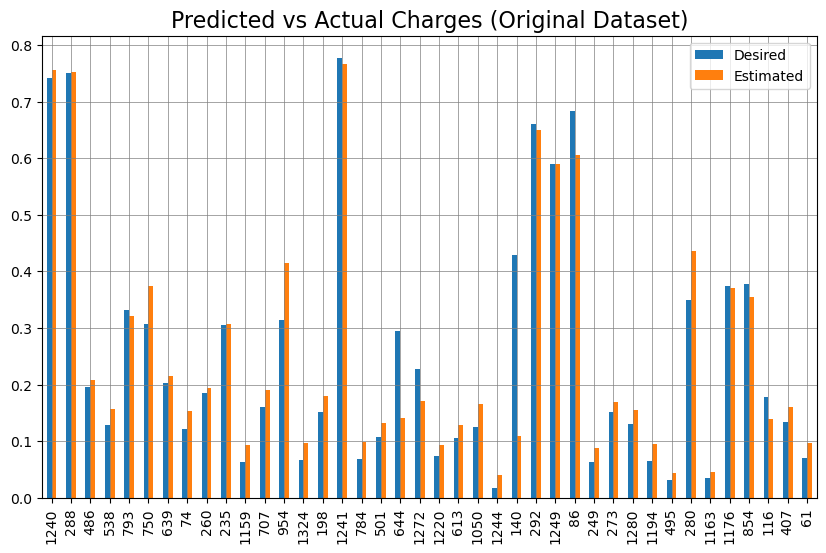

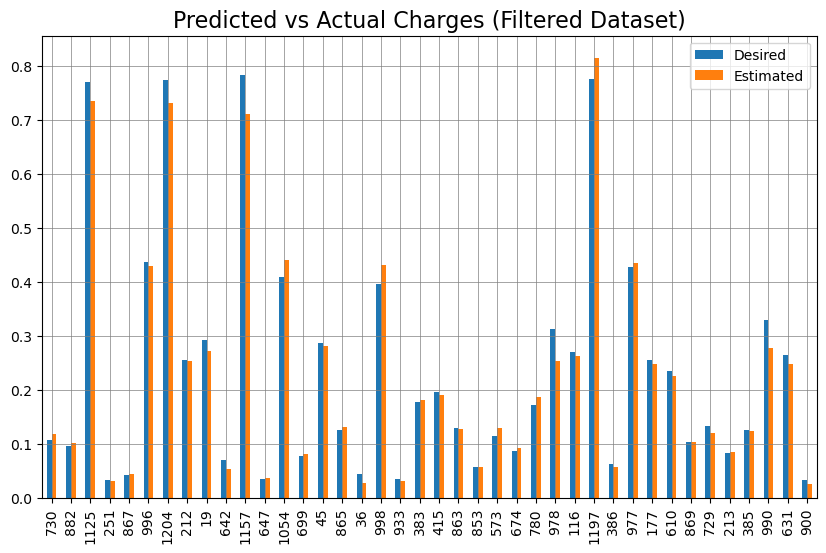

In [114]:
# Prediction for the original dataset
o_predY = mlp_reg_original.predict(o_testX)  # Predicting charges using the original model
df_temp = pd.DataFrame({'Desired': o_testY, 'Estimated': o_predY})  # Create dataframe for comparison
df_temp = df_temp.head(40)  # Select the first 40 rows for plotting
df_temp.plot(kind='bar', figsize=(10, 6))  # Plotting predicted vs actual charges
plt.title("Predicted vs Actual Charges (Original Dataset)", fontsize=16)  # Title for the original dataset
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')  # Major grid lines
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')   # Minor grid lines
plt.show()  # Show the plot
plt.close()  # Close the figure to free resources

# Prediction for the filtered dataset
f_predY = mlp_reg_filtered.predict(f_testX)  # Predicting charges using the filtered model
df_temp = pd.DataFrame({'Desired': f_testY, 'Estimated': f_predY})  # Create dataframe for comparison
df_temp = df_temp.head(40)  # Select the first 40 rows for plotting
df_temp.plot(kind='bar', figsize=(10, 6))  # Plotting predicted vs actual charges
plt.title("Predicted vs Actual Charges (Filtered Dataset)", fontsize=16)  # Title for the filtered dataset
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')  # Major grid lines
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')   # Minor grid lines
plt.show()  # Show the plot
plt.close()  # Close the figure to free resources

<div class="alert alert-block alert-success">
The models predict the desired charges for both the original dataset and the outlier-filtered dataset.<br>
Visualizations compare the actual versus predicted charges, allowing for an evaluation of model performance across both datasets.
</div>

### Training Loss Evaluation

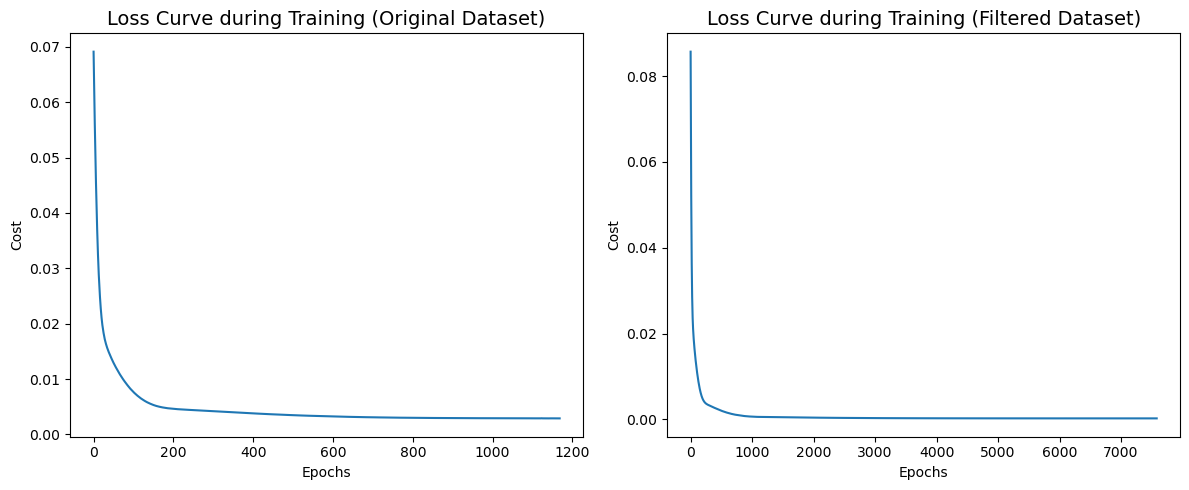

In [115]:
# Creating subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Evaluating the training error for the original model
axes[0].plot(mlp_reg_original.loss_curve_)  # Plot of loss values during the training process
axes[0].set_title("Loss Curve during Training (Original Dataset)", fontsize=14)  # Title for the original model's plot
axes[0].set_xlabel('Epochs')  # Label for the x-axis
axes[0].set_ylabel('Cost')    # Label for the y-axis

# Evaluating the training error for the filtered model
axes[1].plot(mlp_reg_filtered.loss_curve_)  # Plot of loss values during the training process
axes[1].set_title("Loss Curve during Training (Filtered Dataset)", fontsize=14)  # Title for the filtered model's plot
axes[1].set_xlabel('Epochs')  # Label for the x-axis
axes[1].set_ylabel('Cost')    # Label for the y-axis

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()
# Close the figure to free resources
plt.close()

<div class="alert alert-block alert-success">
Subplots are created to visualize the training loss curves for both the original dataset and the outlier-filtered dataset.<br>
These curves illustrate the model's performance during training, showing how the cost evolves over epochs for each dataset.
</div>

### Performance Metrics (Original Dataset)

In [116]:
# Metrics for the neural network MLPRegressor trained with the original dataset
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(o_testY, o_predY))  # Ranges from 0 to infinity; lower values indicate better performance.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(o_testY, o_predY))  # Ranges from 0 to infinity; lower values indicate better performance.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(o_testY, o_predY, squared=False))  # Ranges from 0 to infinity; lower values indicate better performance.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(o_testY, o_predY))  # Represents the percentage error relative to the actual values.
print('R2: ', metrics.r2_score(o_testY, o_predY))  # Represents the R2 Score; ranges from 0 to 1. An R2 of 1 indicates a perfect linear relationship with the data.

Mean Absolute Error (MAE): 0.04156372615293794
Mean Squared Error (MSE): 0.005130305969378928
Root Mean Squared Error (RMSE): 0.071626154227202
Mean Absolute Percentage Error (MAPE): 0.27258490815833314
R2:  0.8406123014067457


<div class="alert alert-block alert-success">
Metrics are calculated for the neural network MLPRegressor trained on the original dataset.<br>
These metrics — <strong>Mean Absolute Error (MAE)</strong>, <strong>Mean Squared Error (MSE)</strong>, <strong>Root Mean Squared Error (RMSE)</strong>, <strong>Mean Absolute Percentage Error (MAPE)</strong>, and <strong>R²</strong> score — provide insights into the model's performance and accuracy in predicting the desired outcomes.
</div>

### Performance Metrics (Filtered Dataset)

In [117]:
# Metrics for the neural network MLPRegressor trained with the filtered dataset
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(f_testY, f_predY))  # Ranges from 0 to infinity; lower values indicate better performance.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(f_testY, f_predY))  # Ranges from 0 to infinity; lower values indicate better performance.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(f_testY, f_predY, squared=False))  # Ranges from 0 to infinity; lower values indicate better performance.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(f_testY, f_predY))  # Represents the percentage error relative to the actual values.
print('R2: ', metrics.r2_score(f_testY, f_predY))  # Represents the R2 Score; ranges from 0 to 1. An R2 of 1 indicates a perfect linear relationship with the data.

Mean Absolute Error (MAE): 0.011705622373788381
Mean Squared Error (MSE): 0.0004992108577177724
Root Mean Squared Error (RMSE): 0.02234302704912144
Mean Absolute Percentage Error (MAPE): 0.0637981013967071
R2:  0.9902524973885045


<div class="alert alert-block alert-success">
The metrics for the MLPRegressor trained on the filtered dataset show notable improvements: <br>
The <strong>MAE</strong>, <strong>MSE</strong>, <strong>RMSE</strong>, and <strong>MAPE</strong> have all decreased, while the <strong>R²</strong> score has significantly increased.<br>
Specifically, the R² score improved from approximately <strong>84%</strong> to <strong>99%</strong>, reflecting a much better fit and enhanced prediction accuracy after filtering outliers.
</div>

## Conclusion

The project successfully demonstrated a comprehensive approach to data quality and analysis. Through meticulous data inspection, manipulation, and cleaning, we ensured the integrity of the dataset. The exploratory data analysis (EDA) revealed valuable insights and patterns, guiding our understanding of the data's characteristics.<br>

We effectively utilized a variety of visualization techniques, including bar charts, heatmaps, pie charts, histograms, boxplots, violin plots, scatter plots, hexbin plots, and KDE, to analyze both categorical and numerical variables across univariate, bivariate, and multivariate representations.<br>

Additionally, the creation and application of an outlier filtering function, based on EDA conclusions and age-specific cost averages, allowed us to remove extreme values while preserving the data's main trends. This preprocessing step significantly enhanced the performance of our predictive model.<br>

The implementation of the Multi-layer Perceptron Regressor (MLPRegressor) showcased the model's capability in forecasting based on different datasets. Notably, the application of outlier filtering improved the model's accuracy from approximately 84% to an impressive 99%, emphasizing the importance of data preprocessing in machine learning tasks.<br>

Overall, this project highlights the critical role of data quality and exploratory analysis in building robust predictive models, paving the way for more accurate decision-making based on reliable information.